# Part I - 2008 Flights Data
## by Bethlehem Dereselegn

## Introduction
> This dataset reports flights in the United States including carriers, arrival and departure delays, and reasons for delays in 2008. 

## Table of Content
<ul>
 <li><a href= '#preliminaryWrangling'>Preliminary Wrangling</a></li>
 <li><a href= '#programmaticAssessment'>Programmatic Assessment</a></li>
 <li><a href= '#cleaning'>Data Cleaning</a></li>
 <li><a href= '#univariate'>Univariate Exploration</a></li>
 <li><a href= '#bivariate'>Bivariate Exploration</a></li>
 <li><a href= '#multivariate'>Multivariate Exploration</a></li>   
 <li><a href= '#conclusions'>Conclusions</a></li>
 <li><a href= '#reference'>Reference</a></li>
</ul>

<a id = 'preliminaryWrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
# load the dataset
flights = pd.read_csv("2008.csv")
flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,...,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,...,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,622.0,620,935.0,930,WN,2621,...,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,1944.0,1945,2210.0,2215,WN,389,...,7.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1453.0,1425,1716.0,1650,WN,519,...,6.0,13.0,0,NaN,0,11.0,0.0,0.0,0.0,15.0


<a id = 'programmaticAssessment'></a>
### Programmatic Assessment

In [3]:
# Printing only the columns of flights dataframe.
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
# Extracting Variables interested on for investigating and save to a dataframe.  
new_flight = flights[['ActualElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','Diverted','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].copy()
new_flight.head()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,68.0,55.0,16.0,18.0,HOU,LIT,393,0,0.0,0.0,0.0,0.0
1,82.0,71.0,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN
2,87.0,71.0,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN
3,120.0,108.0,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN
4,123.0,107.0,16.0,23.0,HOU,MCO,848,0,0.0,0.0,0.0,0.0


In [5]:
# Check the structure of the dataset
new_flight.shape

(2389217, 12)

In [6]:
# Looking for any null value
new_flight.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 12 columns):
ActualElapsedTime    2319121 non-null float64
AirTime              2319121 non-null float64
ArrDelay             2319121 non-null float64
DepDelay             2324775 non-null float64
Origin               2389217 non-null object
Dest                 2389217 non-null object
Distance             2389217 non-null int64
Diverted             2389217 non-null int64
WeatherDelay         584583 non-null float64
NASDelay             584583 non-null float64
SecurityDelay        584583 non-null float64
LateAircraftDelay    584583 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 218.7+ MB


In [7]:
# Checking each variable data type
new_flight.dtypes

ActualElapsedTime    float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
Diverted               int64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [8]:
# check if the dtype and the actual values match
new_flight.sample(10)                # the values in the columns containing numbers are not float, they just have dot 0.

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1168175,70.0,39.0,-35.0,-5.0,JFK,BOS,187,0,NaN,NaN,NaN,NaN
1607702,268.0,236.0,-5.0,-11.0,SAN,DTW,1957,0,NaN,NaN,NaN,NaN
1699994,50.0,37.0,-5.0,5.0,MIA,TPA,204,0,NaN,NaN,NaN,NaN
56370,51.0,42.0,-19.0,-5.0,MDW,STL,251,0,NaN,NaN,NaN,NaN
412910,NaN,NaN,NaN,NaN,RST,ORD,268,0,NaN,NaN,NaN,NaN
1059647,139.0,120.0,78.0,78.0,MIA,BNA,806,0,0.0,0.0,0.0,78.0
1895627,50.0,30.0,-15.0,-10.0,EWR,PVD,160,0,NaN,NaN,NaN,NaN
873050,324.0,306.0,79.0,109.0,FLL,LAS,2174,0,0.0,0.0,0.0,79.0
2035683,144.0,131.0,46.0,60.0,DEN,SJC,948,0,0.0,0.0,0.0,46.0
1269176,348.0,332.0,23.0,10.0,MHT,PHX,2279,0,0.0,13.0,0.0,4.0


### Quality Issue
- ActualElapsedTime,AirTime,ArrDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay and LateAircraftDelay contains null values.
- Datatype of ActualElapsedTime,AirTime,ArrDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay and LateAircraftDelay is incorrect.

<a id = 'cleaning'></a>
### Data Cleaning

#### Issue1

#### Define: Remove rows containing null values using dropna().

#### Code

In [9]:
# removing row containing null values
new_flight.dropna(inplace=True)          

#### Test

In [10]:
new_flight.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584583 entries, 0 to 2389197
Data columns (total 12 columns):
ActualElapsedTime    584583 non-null float64
AirTime              584583 non-null float64
ArrDelay             584583 non-null float64
DepDelay             584583 non-null float64
Origin               584583 non-null object
Dest                 584583 non-null object
Distance             584583 non-null int64
Diverted             584583 non-null int64
WeatherDelay         584583 non-null float64
NASDelay             584583 non-null float64
SecurityDelay        584583 non-null float64
LateAircraftDelay    584583 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 58.0+ MB


#### Issue 2

#### Define: Change datatype of ActualElapsedTime,AirTime,ArrDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay and LateAircraftDelay from float64 to int64 using astype(np.int64)

#### Code

In [11]:
new_flight['ActualElapsedTime'] = new_flight['ActualElapsedTime'].astype(np.int64) 
new_flight['AirTime'] = new_flight['AirTime'].astype(np.int64) 
new_flight['ArrDelay'] = new_flight['ArrDelay'].astype(np.int64) 
new_flight['DepDelay'] = new_flight['DepDelay'].astype(np.int64) 
new_flight['WeatherDelay'] = new_flight['WeatherDelay'].astype(np.int64) 
new_flight['NASDelay'] = new_flight['NASDelay'].astype(np.int64) 
new_flight['SecurityDelay'] = new_flight['SecurityDelay'].astype(np.int64) 
new_flight['LateAircraftDelay'] = new_flight['LateAircraftDelay'].astype(np.int64) 

#### Test

In [12]:
new_flight.dtypes

ActualElapsedTime     int64
AirTime               int64
ArrDelay              int64
DepDelay              int64
Origin               object
Dest                 object
Distance              int64
Diverted              int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
dtype: object

In [13]:
# Set the index to have a proper number sequence
new_index = np.arange(0,584583,1)
new_flight.set_index(new_index,inplace=True)
new_flight.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            584573, 584574, 584575, 584576, 584577, 584578, 584579, 584580,
            584581, 584582],
           dtype='int64', length=584583)

### What is the structure of your dataset?

>The dataset new_flight contains 584583 entries each with 12 features.
- ActualElapsedTime, AirTime, ArrDelay, DepDelay, Distance, Diverted,WeatherDelay,NASDelay,SecurityDelay, and LateAircraftDelay contains discrete numeric data.
- The values of column Origin and Dest are qualitative data.

### What is/are the main feature(s) of interest in your dataset?

> I am intrigued on finding out which feature(s) is related to the arrival delay of a flight to its destination.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I anticipate arrival delay of a flight is caused by all the delay features in this dataset. 

<a id = 'univariate'></a>
## Univariate Exploration
> Plot each features to see their distribution according to their datatype.

In [94]:
# functions to use for all the plot 

# Univariate plots
def count_plot(x,x_label):
    '''for bar plot'''
    plt.figure(figsize=(25,5))
    sb.countplot(data=new_flight,x = x,color = sb.color_palette()[0])
    plt.xticks(rotation=90)
    plt.xlabel(x_label)
    plt.show()
    
def box_plot(x,ticks,x_label):                  
    '''for box plot'''
    plt.figure(figsize=(25,5))
    sb.boxplot(data = new_flight,x = x,fliersize = 3,color=sb.color_palette()[0])  # used box plot to understand the distribution
    labels = ['{}'.format(t) for t in ticks]
    plt.xticks(ticks,labels)
    plt.xlabel(x_label)
    plt.show()
    
def boxplot_xlim(x,ticks,x_label,a,b):          
    '''box plot with limited x values'''
    plt.figure(figsize=(25,5))
    sb.boxplot(data = new_flight,x = x,fliersize = 3,color=sb.color_palette()[0])  # used box plot to understand the distribution
    labels = ['{}'.format(t) for t in ticks]
    plt.xticks(ticks,labels)
    plt.xlabel(x_label)
    plt.xlim(a,b)
    plt.show()
    
def violin_plot(y):
    '''function for violin plot'''
    plt.figure(figsize=(8,5))
    sb.violinplot(data = new_flight,y=y , color=sb.color_palette()[0])
    plt.show()
    

# Bivariate plot
def scatter(x,y):                              
    '''scatter plot'''
    plt.figure(figsize=(10,5))
    sb.regplot(data = new_flight,x = x,y = y,fit_reg=False)
    plt.show()
        
def bivariate_boxPlot(x,y):                     
    '''bivariate box plot'''
    plt.figure(figsize=(40,10))
    sb.boxplot(data = new_flight, x = x, y = y, color=sb.color_palette()[0])
    plt.xticks(rotation=90)
    plt.show()

def bar_plot(x,y):                             
    '''bivariate bar plot'''
    plt.figure(figsize=(30,5))
    sb.barplot(data = new_flight,x = x,y = y,ci = None,color = sb.color_palette()[0]) # used bar plot to understand the distribution
    plt.xticks(rotation=90)
    plt.show()

def bi_scatter(d,x,y):
    figure(num=None, figsize=(20,12), dpi=80, facecolor='w', edgecolor='r')
    sb.boxplot(data = d, x = x, y = y, color=sb.color_palette()[0])
    plt.xticks(rotation=90)
    plt.show()
    
# Multivariate plot  
def multi_scatter(x,y,c,colorbar_label):
    '''multiivariate bar plot'''
    plt.figure(figsize=[10,5])
    plt.scatter(data=new_flight,x = x,y = y,c = c,cmap='viridis_r')
    plt.colorbar(label= colorbar_label)
    plt.show()

> I want to understand which features from this dataset affects the arrival delay. But before understanding there relationships,I am gone start investigating their distribution within new_flight.Starting from the main feature **ArrDelay**

In [15]:
# ArrDelay statistic
new_flight.ArrDelay.describe()

count    584583.000000
mean         55.906831
std          56.037212
min          15.000000
25%          23.000000
50%          36.000000
75%          68.000000
max        2461.000000
Name: ArrDelay, dtype: float64

The minimum value of ArrDelay is 15 and the maximum is 2461, Using this numbers to generate numpy array plot the distribution using box plot.

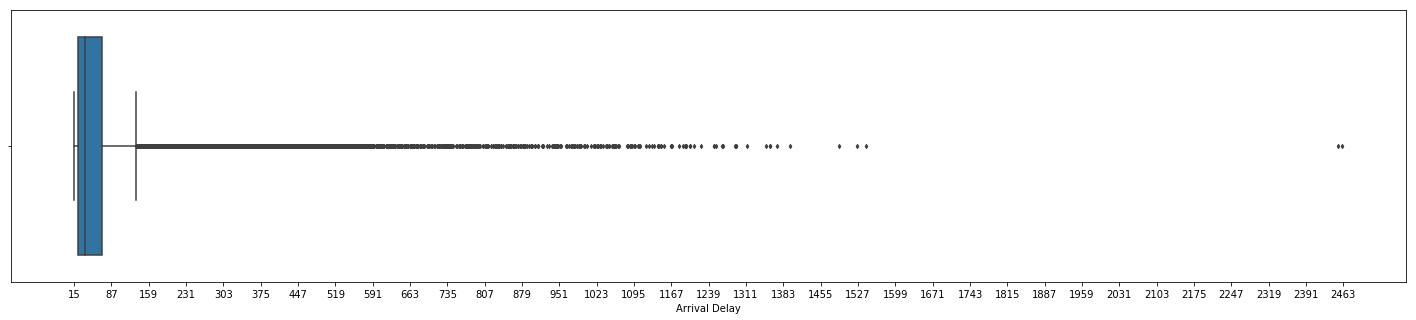

In [16]:
# ArrDelay using boxplot
ticks = np.arange(15,2475,72)                     # max number is 2475 so that the plot will include 2461 with the interval of 72
box_plot('ArrDelay',ticks,'Arrival Delay')

Limiting the number of the x values to look closely to the box plot so that the median line and quartile values would be come clearly.

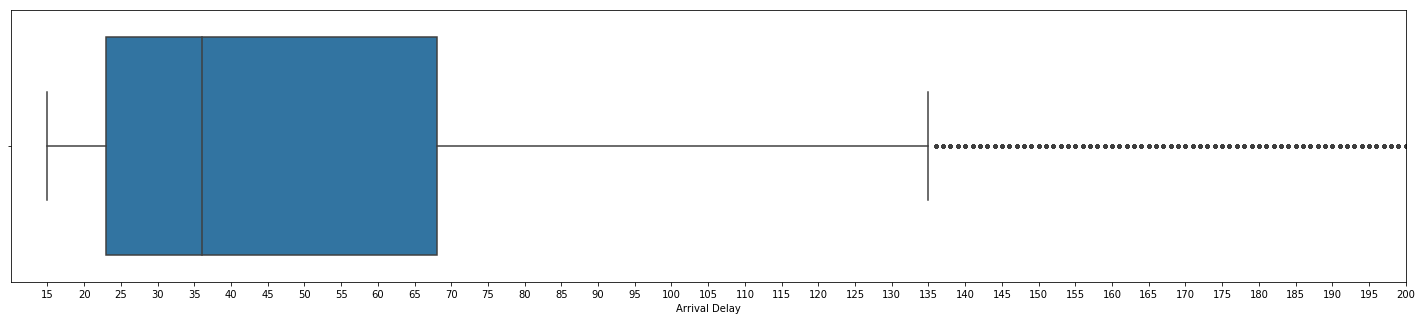

In [17]:
# limiting the data to look closely to the distribution
ticks = np.arange(15,2475,5)
boxplot_xlim('ArrDelay',ticks,'Arrival Delay',10,200)

> **Observation**

The interquartile section of box plot contains 50% of the data distribution, therefore for the plot above 50% values of ArrDelay are found in range 20 - 70 not including the boundaries.

If the median of box plot is closer to the bottom of box plot it shows its right skewed and if its closer to the upper ending its left skewed. From the chart the median is closer to the bottom of the box plot and the whisker is shorter on the lower end thus ArrDelay is positively skewed. Hence, the data is distributed in the right side. As it can be seen the distribution maximum value around 135, thus many recordes of arrival delay are below or equal to this value.

> Next, charts with the distribution of the other features to get information on each of them. The first feature will be **DepDelay**(Departure Delay)

In [18]:
# DepDelay statistic
new_flight.DepDelay.describe()

count    584583.000000
mean         47.541619
std          58.024953
min         -61.000000
25%          12.000000
50%          32.000000
75%          63.000000
max        2467.000000
Name: DepDelay, dtype: float64

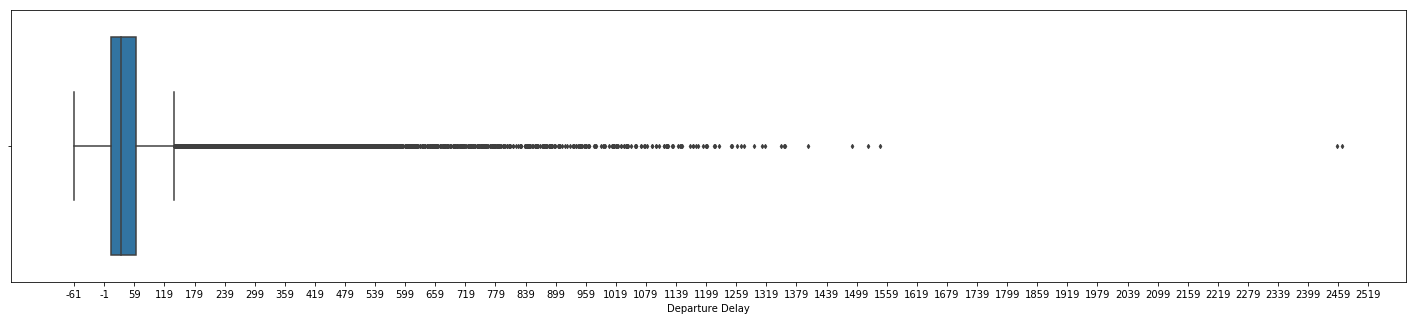

In [19]:
# DepDelay using boxplot
ticks = np.arange(-61,2520,60)
box_plot('DepDelay',ticks,'Departure Delay')

By limiting the number of x values on the plot, I want to look more closely on the box plot. Because in the above chart it seems DepDelay is normally distributed

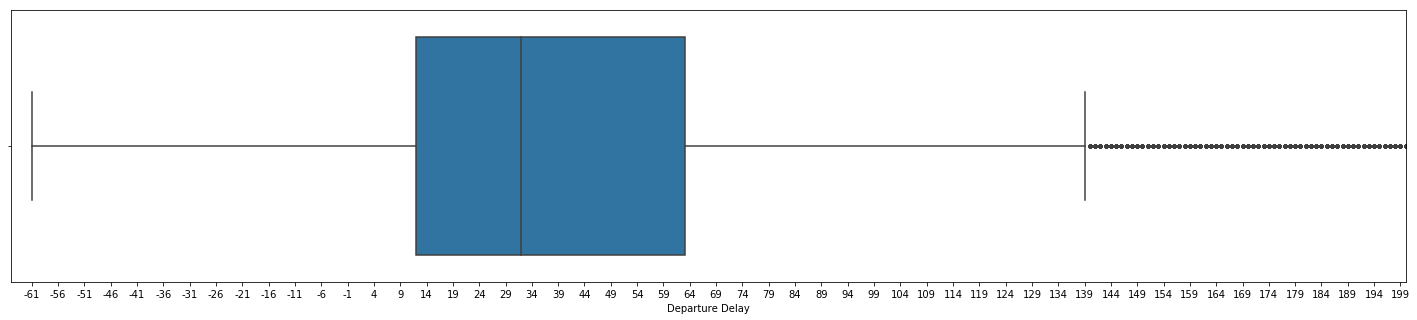

In [20]:
# limiting the data to look closely to the distribution
ticks = np.arange(-61,2520,5)
boxplot_xlim('DepDelay',ticks,'Departure Delay',-65,200)

> **Observation**

As it can be see DepDelay is not normally distributed and the interquartile range lay between 9 - 64 range without including the boundaries,this imply 50% of the DepDelay lays in within this range of value. Since the median line is closer to the the lower end of the box plot DepDelay is right skewed. Most data are distributed below the maximum value on the upper whisker.

> The second feature to look at is **ActualElapsedTime**

In [21]:
# ActualElapsedTime statistic
new_flight.ActualElapsedTime.describe()

count    584583.000000
mean        142.616742
std          74.560081
min          15.000000
25%          88.000000
50%         126.000000
75%         177.000000
max         905.000000
Name: ActualElapsedTime, dtype: float64

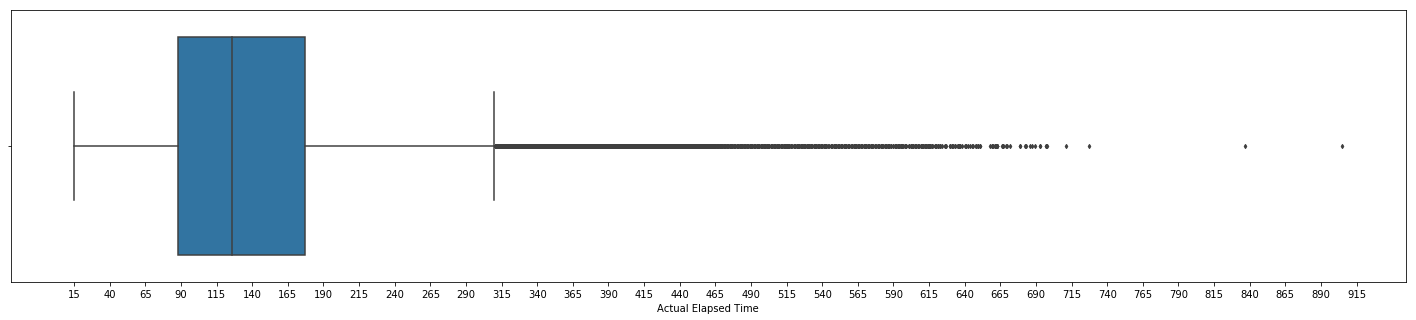

In [22]:
# ActualElapsedTime using boxplot
ticks = np.arange(15,925,25)
box_plot('ActualElapsedTime',ticks,'Actual Elapsed Time')

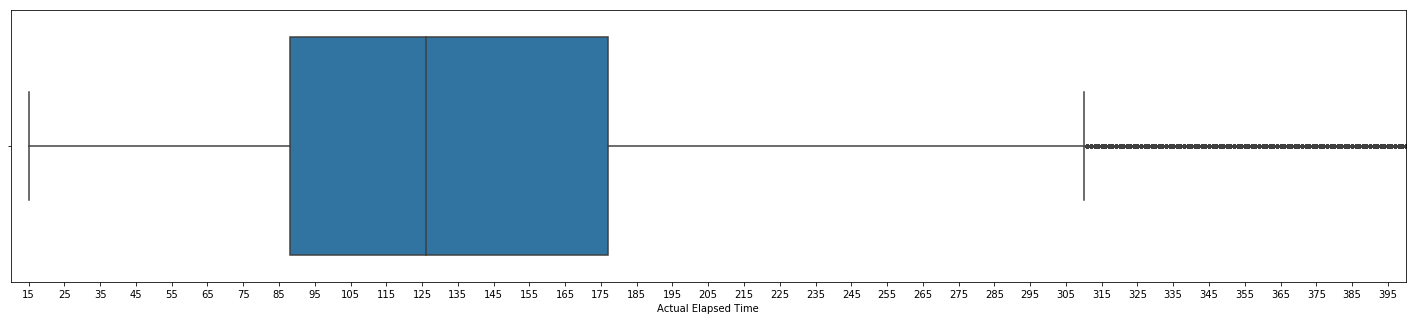

In [23]:
# limiting the data to look closely to the distribution
ticks = np.arange(15,925,10)
boxplot_xlim('ActualElapsedTime',ticks,'Actual Elapsed Time',10,400)

> **Observation**

It is observed the IQR range is in 85 -185.The plot perceive the median line being closer to the first quartile and also the whisker found between the minimum and the first quartile is shorter therefore ActualElapsedTime is right skewed.

> The third variable to investigate is **AirTime**

In [24]:
# AirTime statistic
new_flight.AirTime.describe()

count    584583.000000
mean        112.363512
std          70.993645
min           0.000000
25%          60.000000
50%          94.000000
75%         143.000000
max         886.000000
Name: AirTime, dtype: float64

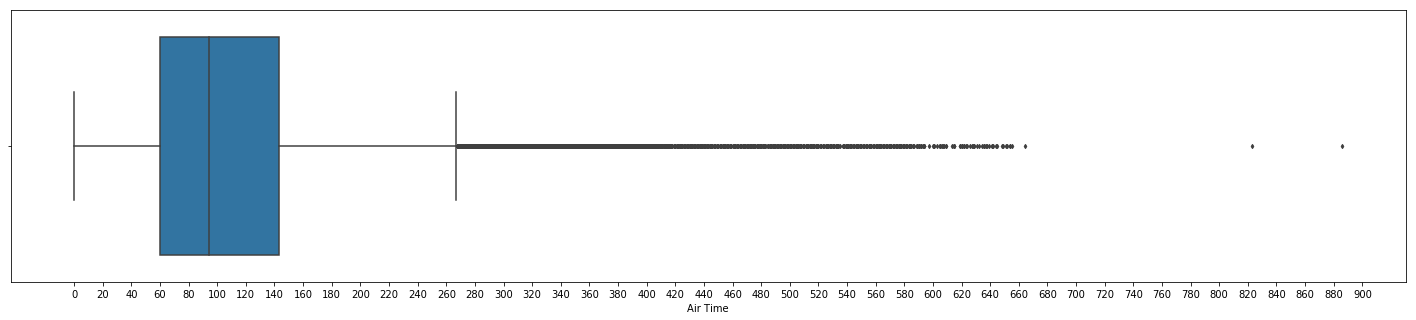

In [25]:
# AirTime using boxplot
ticks = np.arange(0,920,20)
box_plot('AirTime',ticks,'Air Time')

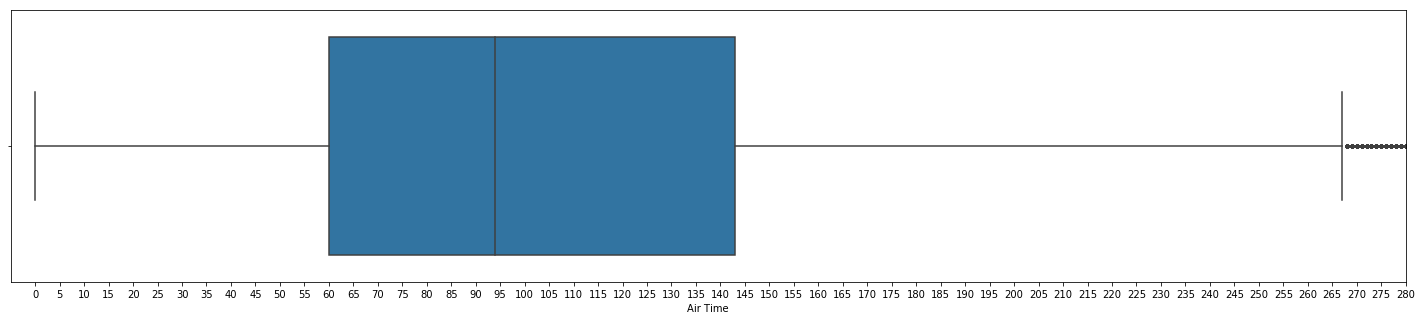

In [26]:
# limiting the data to look closely to the distribution
ticks = np.arange(0,920,5)
boxplot_xlim('AirTime',ticks,'Air Time',-5,280)

> **Observation**

As the graph shows 50% of the data is found within the 60 - 145 range. The lower whisker is shorter and the median is found closely to the bottom of the box, thus AirTime is positively skewed.

> Fourth variable to understand its distribution is **Origin**

In [27]:
# Identifying the largest and smallest counts of airports in the dataset
new_flight.Origin.value_counts()

ORD    42218
ATL    35358
DFW    25626
DEN    19706
DTW    18546
EWR    16225
LAX    15993
IAH    15611
LAS    13328
PHX    13111
MSP    12991
LGA    12843
SFO    12078
JFK    11307
BOS    10567
MCO    10508
SLC     9890
CLT     9627
PHL     8882
CVG     8761
MDW     8108
BWI     7873
IAD     7562
MEM     7425
FLL     7028
SEA     7005
MIA     6962
SAN     6451
DCA     6043
CLE     5990
       ...  
ROW       44
TEX       43
GCC       43
MOT       43
OXR       43
SCC       42
PSE       39
CDC       38
FLO       37
ADQ       36
LYH       30
IYK       30
COD       24
BTM       21
RKS       20
SUX       18
SLE       18
MKG       18
CMX       17
LWS       15
ALO       15
ACY       14
PLN       10
RHI        8
BPT        7
BLI        4
ADK        4
DLG        1
TUP        1
AKN        1
Name: Origin, Length: 291, dtype: int64

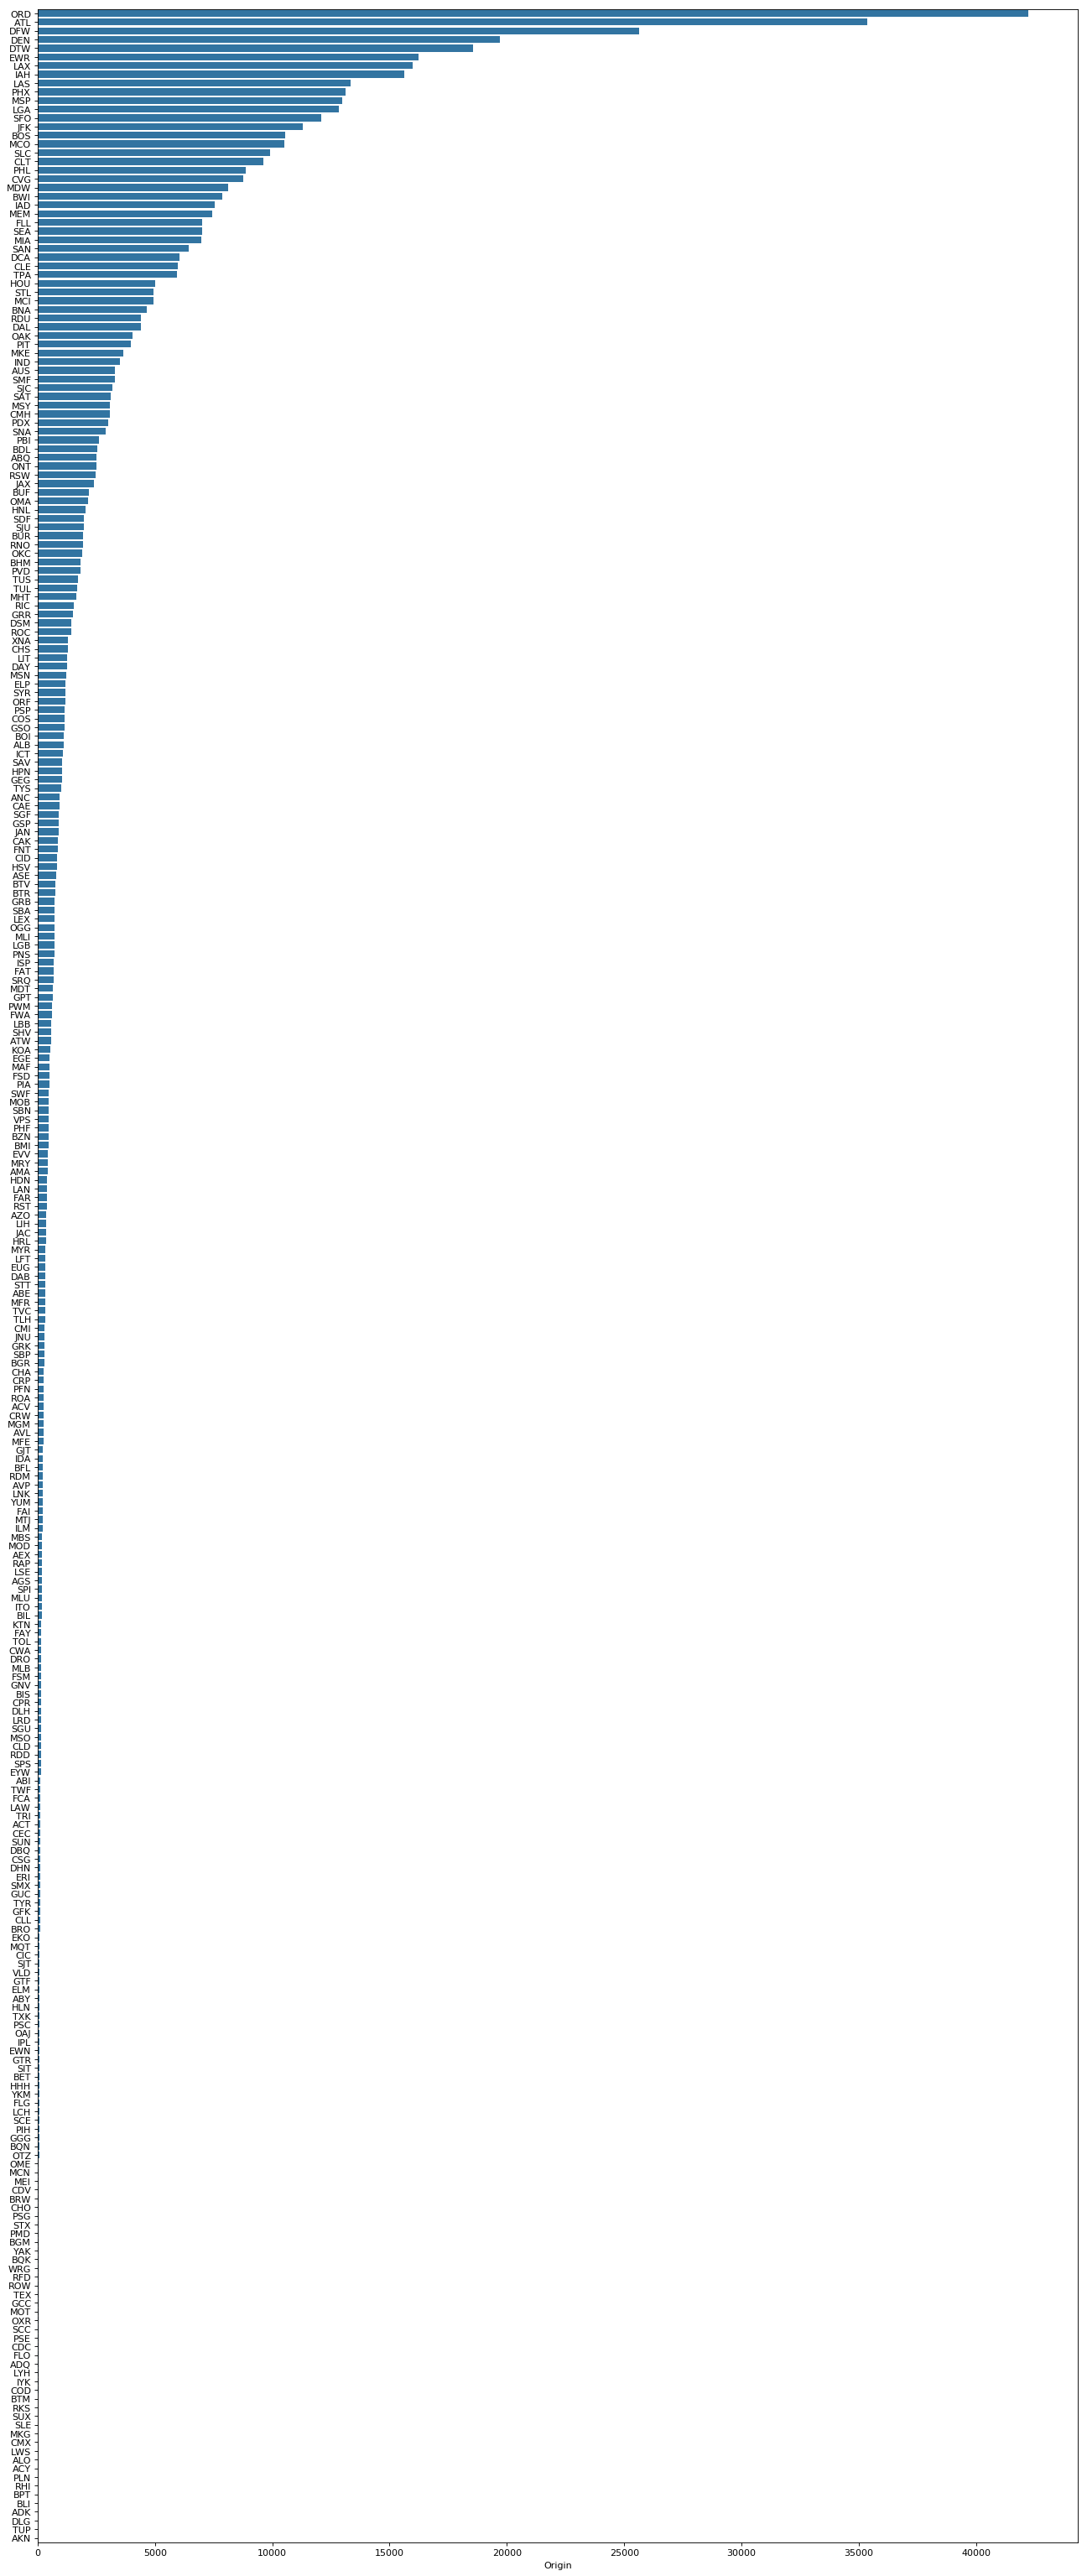

In [28]:
figure(num=None, figsize=(20,50), dpi=80, facecolor='w', edgecolor='r')
sb.barplot(y=new_flight.Origin.value_counts().index, x = new_flight.Origin.value_counts() , data = new_flight,color=sb.color_palette()[0])
plt.show()

> **Observations**

ORD(Chicago O'Hare airport) has the largest number of flights take off while DLG(Dillingham Airport),TUP(Tupelo Regional Airport) and AKN(King Salmon airport) have the least.

The fifth variable to investigate is **Dest**(Destination)

In [29]:
# Identifying the largest and smallest counts of destination airports in the dataset
new_flight.Dest.value_counts()

ORD    38804
ATL    32528
DFW    22167
LAX    18742
DEN    17010
EWR    16569
LGA    14750
SFO    14325
IAH    14242
LAS    13972
PHX    13159
DTW    12697
MCO    11419
JFK    10514
MSP    10246
SLC     9709
BOS     9287
CLT     9112
PHL     8566
SEA     8337
SAN     7262
BWI     7235
CVG     7075
FLL     6989
MIA     6817
TPA     6766
MEM     6764
MDW     6624
IAD     6335
DCA     5781
       ...  
OTZ       51
COD       50
LYH       48
BRW       47
MEI       44
STX       42
FLO       41
RFD       39
SCC       35
IYK       33
ADQ       32
PMD       29
BTM       27
BPT       26
CDC       25
ACY       25
LWS       25
GCC       23
MKG       22
CMX       21
SUX       20
TEX       19
ALO       15
BLI       12
ADK       11
RKS       10
RHI        8
PLN        7
AKN        1
DLG        1
Name: Dest, Length: 290, dtype: int64

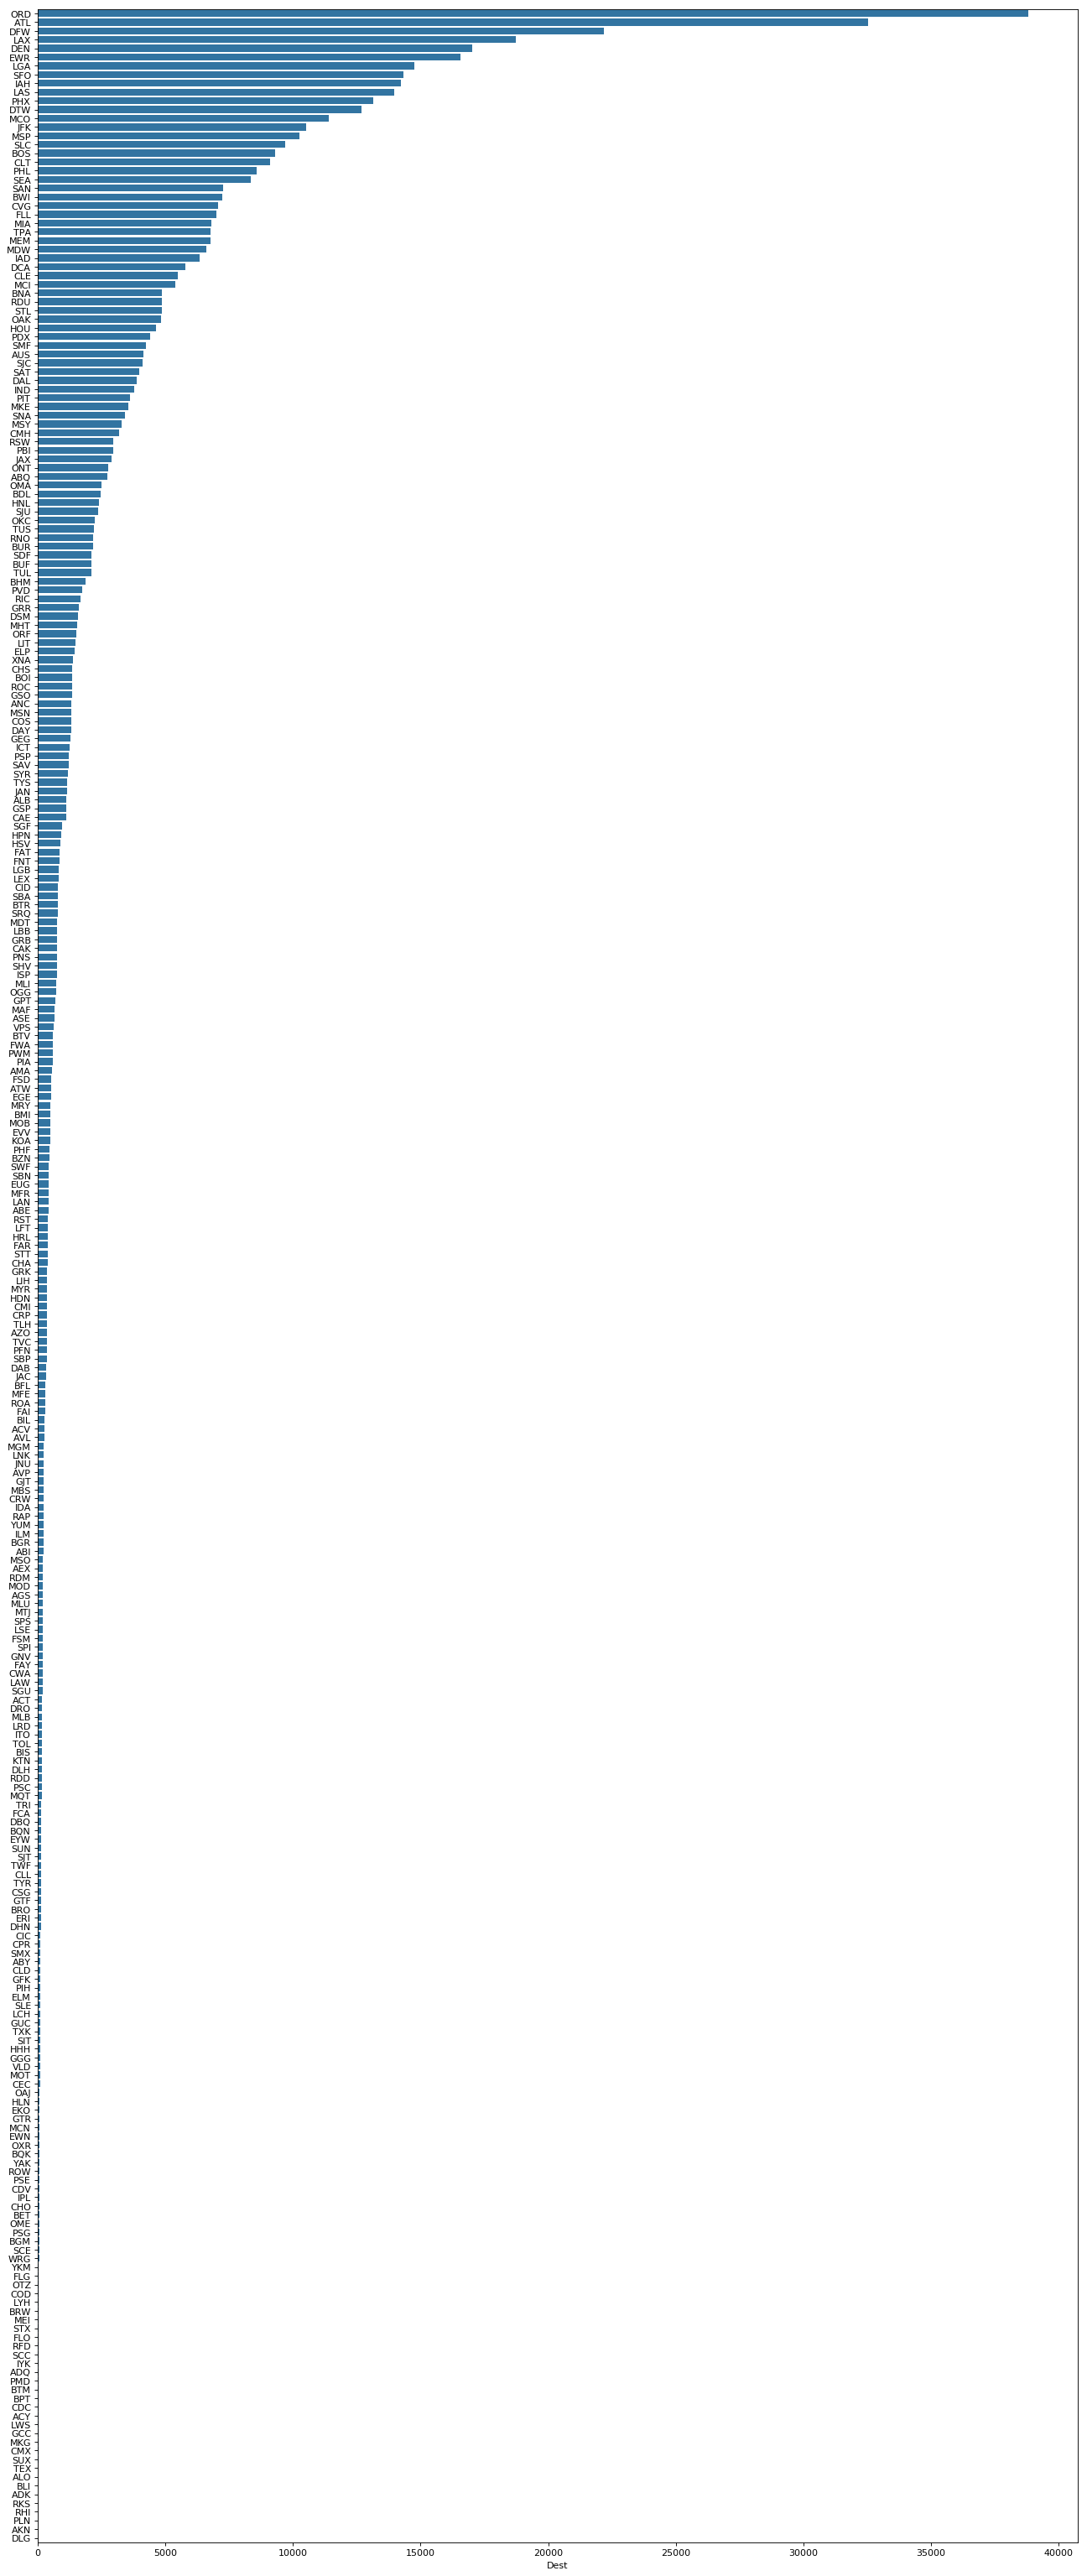

In [30]:
figure(num=None, figsize=(20,50), dpi=80, facecolor='w', edgecolor='r')
sb.barplot(y=new_flight.Dest.value_counts().index, x = new_flight.Dest.value_counts() , data = new_flight,color=sb.color_palette()[0])
plt.show()

> **Observations**

ORD(Chicago O'Hare airport) has the largest number of flights land while DLG(Dillingham Airport) and AKN(King Salmon airport) have the least.

> **Distance** is the seventh feature to understand the distribution

In [31]:
# Distance statistic
new_flight.Distance.describe()

count    584583.000000
mean        756.200341
std         562.717225
min          24.000000
25%         337.000000
50%         606.000000
75%         992.000000
max        4962.000000
Name: Distance, dtype: float64

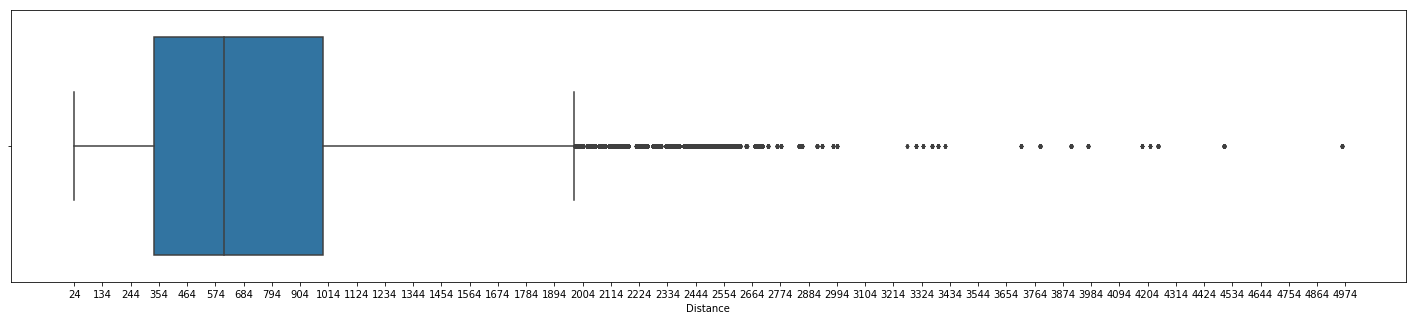

In [32]:
# AirTime using boxplot
ticks = np.arange(24,5000,110)
box_plot('Distance',ticks,'Distance')

Limiting the values of the x on the chart to plot, the box plot can be seen closely

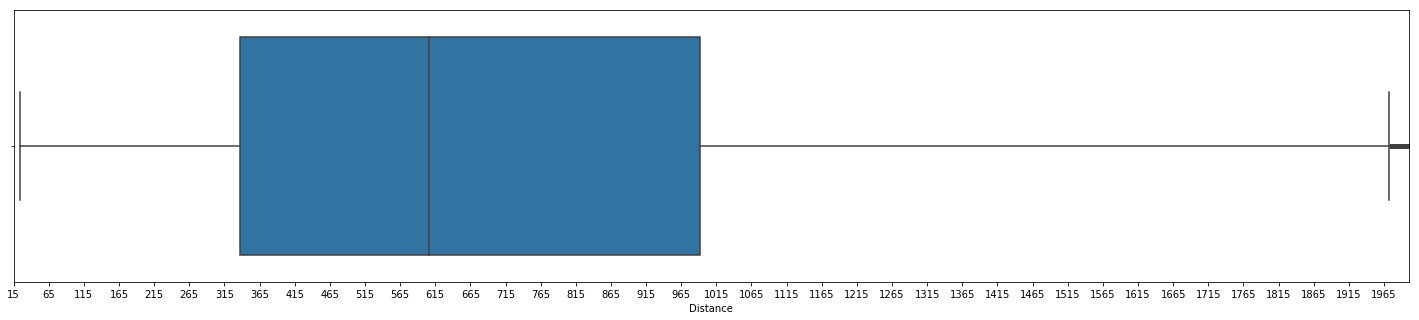

In [33]:
# limiting the data to look closely to the distribution
ticks = np.arange(15,5000,50)
boxplot_xlim('Distance',ticks,'Distance',15,2000)

> **Observations**

50% of the data distribution lays in within the range 315 - 1015 not including this numbers as the true boundaries.Here also the median lay closer to bottom of the box plot and it can be seen the lower whisker is shorter implying that Distance is also positively skewed. This variable contain outliers as it can be seen more in the first graph of Distance.

> The distribution of the Eighth element which is **Diverted**

In [34]:
# Diverted statistic
new_flight.Diverted.describe()

count    584583.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Diverted, dtype: float64

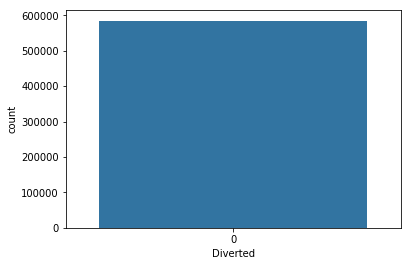

In [35]:
# Diverted variable contains only 0 value
sb.countplot(data=new_flight,x = 'Diverted',color = sb.color_palette()[0])                   # to show in minimum size figure rather than using the figure in the function
plt.xlabel('Diverted');

From the plot, it's shown that Diverted is zero for every entry, I want to use value_counts() to check it's accuracy.

In [36]:
# to count the number different values Diverted contains
new_flight.Diverted.value_counts()

0    584583
Name: Diverted, dtype: int64

> **Observations** 

As it can be seen from the above plot Diverted only has zero values in all its entries. There it can be stated there was no diverted flight reported in all airports.

> Jumping to the ninth element, **WeatherDelay**

In [37]:
# WeatherDelay statistic
new_flight.WeatherDelay.describe()

count    584583.000000
mean          2.938243
std          19.166662
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1148.000000
Name: WeatherDelay, dtype: float64

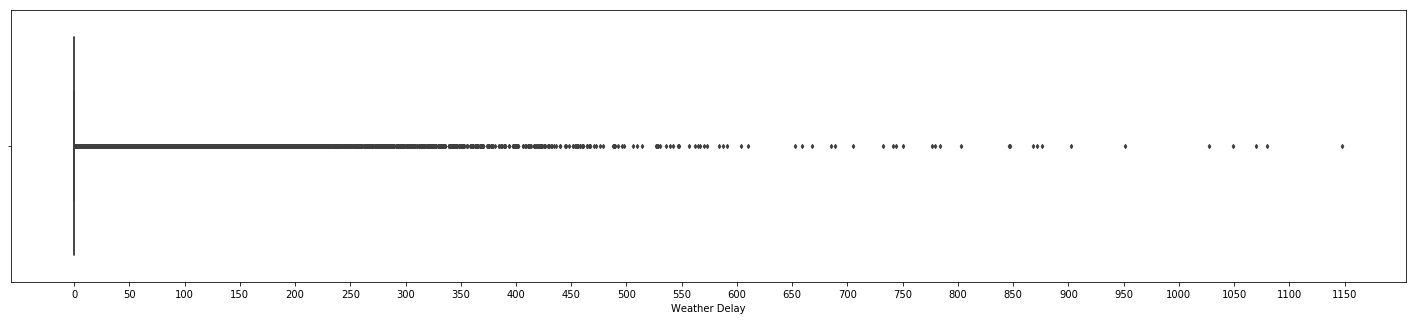

In [38]:
# WeatherDelay using boxplot
ticks = np.arange(0,1151,50)
box_plot('WeatherDelay',ticks,'Weather Delay')

In [39]:
# to know how many uniques value WeatherDelay have
new_flight.WeatherDelay.value_counts()

0       546933
10        1181
15        1093
6         1066
7          992
8          970
9          907
5          867
4          823
20         808
12         792
11         786
2          760
3          760
14         754
16         740
13         726
17         720
1          715
18         683
25         624
19         605
21         570
30         555
22         528
23         522
24         492
28         480
26         442
27         435
         ...  
359          1
358          1
868          1
610          1
387          1
304          1
570          1
902          1
419          1
418          1
417          1
668          1
414          1
557          1
412          1
1070         1
409          1
408          1
291          1
562          1
803          1
401          1
659          1
565          1
399          1
293          1
567          1
653          1
1080         1
510          1
Name: WeatherDelay, Length: 481, dtype: int64

I want to use violin plot to further see the distrbution around zero 

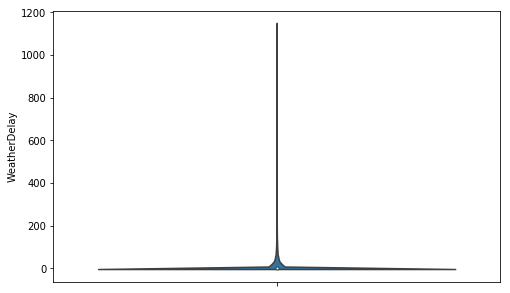

In [92]:
violin_plot('WeatherDelay')

> **Observations**

From the graph, it's understood most records of weather delay are zero indicating majority of airports doesn't have a weather delay on their flights. Eventhough,the distribution shows most all values are equal to the median which is 0, there are outliers observed.

> Next, the tenth variable,**NASDelay**

In [41]:
# NASDelay statistics
new_flight.NASDelay.describe()

count    584583.000000
mean         16.158462
std          30.534167
min           0.000000
25%           0.000000
50%           5.000000
75%          20.000000
max        1357.000000
Name: NASDelay, dtype: float64

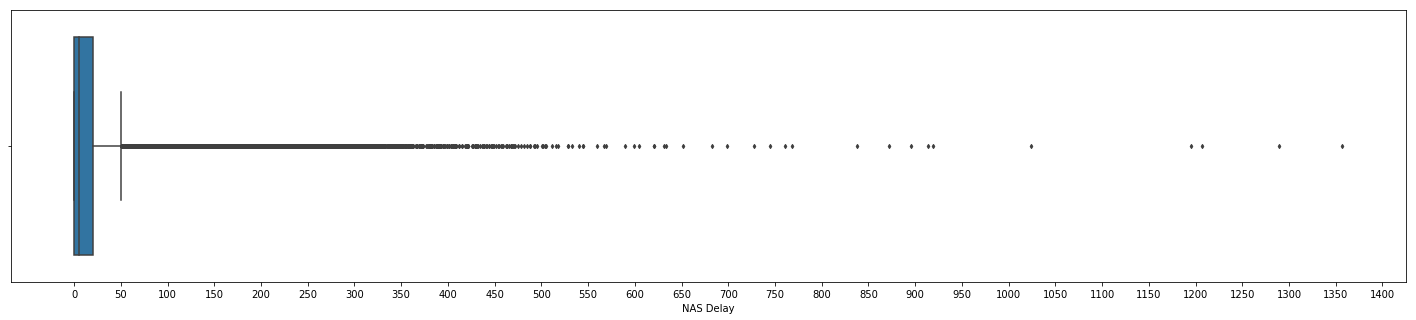

In [42]:
# NASDelay using boxplot
ticks = np.arange(0,1401,50)
box_plot('NASDelay',ticks,'NAS Delay')

To zoom to the box by limiting the x values

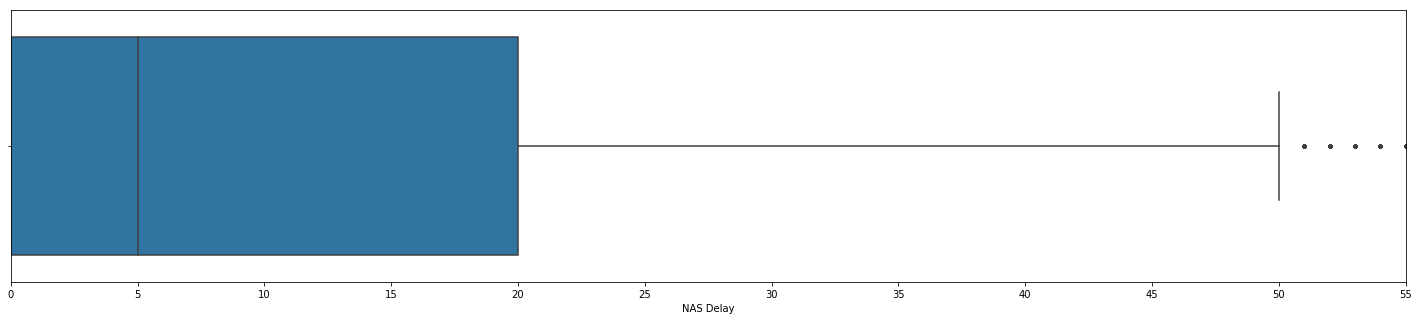

In [43]:
# limiting the data to look closely to the distribution
ticks = np.arange(0,5000,5)
boxplot_xlim('NASDelay',ticks,'NAS Delay',0,55)

> **Observations** 

As it can be seen the median line is closer to the lower end and the lower whisker is equal to zero thus indicate NASDelay is positively skewed. The distribution being right skewed imply majority of the airports delay due to  non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc have low values. But still it does contain outliers as seen on the first graph of NASDelay.

> The Eleventh feature,**SecurityDelay** distribution

In [44]:
# SecurityDelay statistics
new_flight.SecurityDelay.describe()

count    584583.000000
mean          0.080459
std           1.742579
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         392.000000
Name: SecurityDelay, dtype: float64

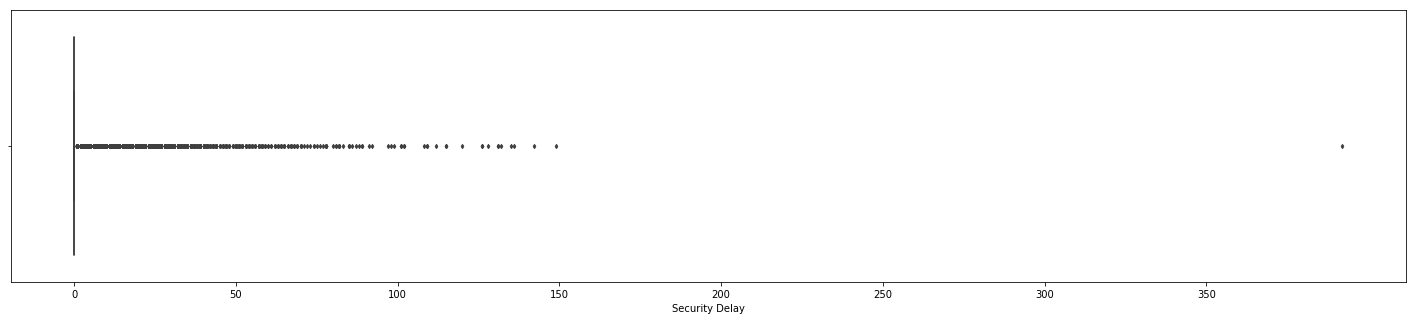

In [45]:
# SecurityDelay using boxplot
ticks = np.arange(0,400,50)
box_plot('SecurityDelay',ticks,'Security Delay')

I used violin plot below to better understand the distribution meaning around zero

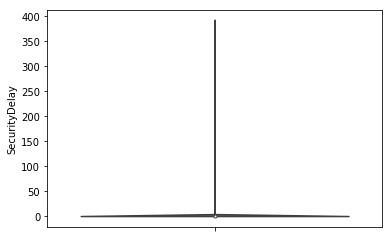

In [46]:
# SecurityDelay using violin plot
sb.violinplot(data = new_flight,y='SecurityDelay' , color=sb.color_palette()[0])
plt.show()

Using value_counts to understand the numbers on the plots

In [47]:
# to further see the values in the variable
new_flight.SecurityDelay.value_counts()

0      581835
7         162
8         155
6         145
15        126
9         124
5         121
4         120
10        114
3         108
11        106
12         98
16         93
17         92
1          90
2          85
13         80
14         75
18         62
19         58
20         53
22         48
21         43
23         41
27         31
28         31
30         30
25         29
24         27
26         24
        ...  
74          2
66          2
61          2
60          2
128         1
132         1
135         1
120         1
99          1
112         1
108         1
142         1
136         1
80          1
98          1
97          1
92          1
91          1
88          1
87          1
86          1
83          1
77          1
76          1
75          1
73          1
72          1
71          1
149         1
392         1
Name: SecurityDelay, Length: 109, dtype: int64

> **Observations**

From the graph, it's understood the majority airports within the dataset have a zero value of SecurityDelay variable, indicating there isn't security delay in most of the flights.Although,this has been stated,there are outliers having different value than 0. 

> The last feature to understand its distribution is **LateAircraftDelay**

In [48]:
# LateAircraftDelay statistic
new_flight.LateAircraftDelay.describe()

count    584583.000000
mean         20.976710
std          38.617154
min           0.000000
25%           0.000000
50%           0.000000
75%          27.000000
max        1254.000000
Name: LateAircraftDelay, dtype: float64

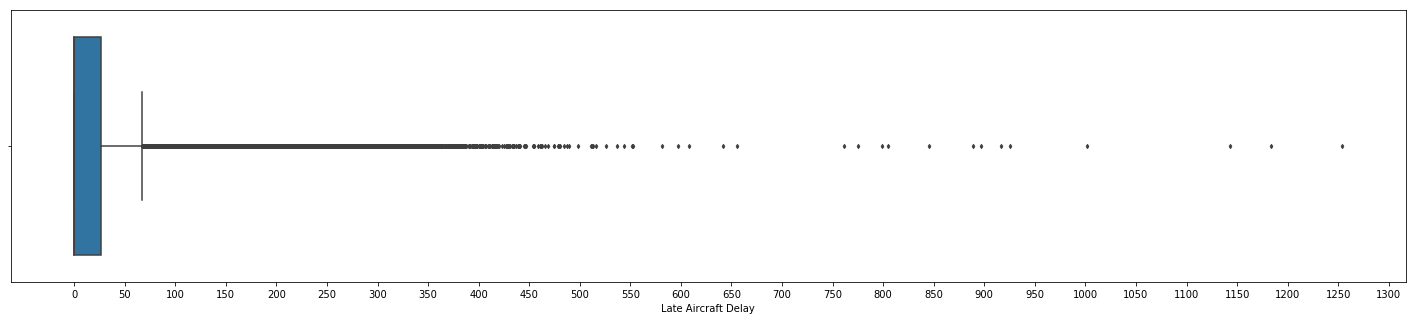

In [49]:
# LateAircraftDelay using boxplot
ticks = np.arange(0,1301,50)
box_plot('LateAircraftDelay',ticks,'Late Aircraft Delay')

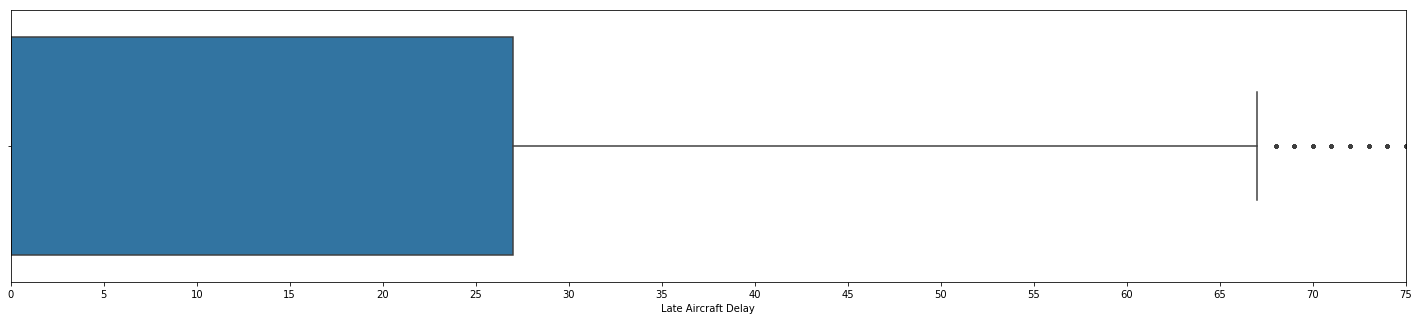

In [50]:
# limiting the data to look closely to the distribution
ticks = np.arange(0,1301,5)
boxplot_xlim('LateAircraftDelay',ticks,'Late Aircraft Delay',0,75)

> **Observations**

The lower whisker and median is equal to the minimum value which mean the skewness of LateAircraftDelay is on the righ side. The distribution being on the right side  inquire delay caused by late aircraft is low on the majority of entries.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Eventhough there is many data entries, the variable containing numerical data being discrete made me use barchart, thus I didn't perform any transformation on the data.
- It was interesting to understand all features in the dataset have right skewness except Diverted which is 0 for every entry. This implied that majority of the airports have a lower values on their discrete data features with respect to their ranges of values.
- It is also observed from Origin and Dest plots, the airport with the highest number of flights also have the highest destination flights. It's the same way for the airports with the least number of flight except for *Tup*. Evenif TUP is one of the airports having low count of flights, it isn't one of the airports receiving lowest number of flights.

<a id = 'bivariate'></a>
## Bivariate Exploration

> In the univariate section, the distribution of each variable is plotted. The next step is to see the other variables relation to the main variable(ArrDelay).

> First: The relation between **ArrDelay and DepDelay**

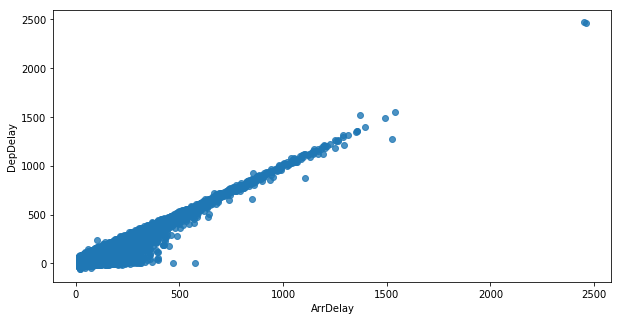

In [51]:
# Arrival Delay and Departure Delay (numerical Vs numerical)
scatter('ArrDelay','DepDelay')                             # calling function scatter

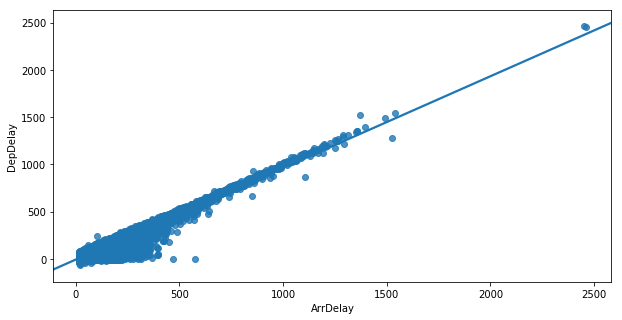

In [52]:
# line fitting the scatter plot
plt.figure(figsize=(10,5))
sb.regplot(data = new_flight,x = 'ArrDelay',y = 'DepDelay',fit_reg = True)  
plt.show()

> **Observations**

As the value of ArrDelay increases the value of DepDelay also increases this show positive correlation between the two features.

> Second: The relation between **ArrDelay and ActualElapsedTime**

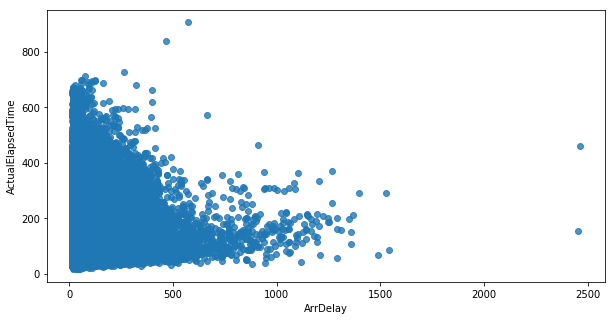

In [53]:
# Arrival Delay and Actual Elapsed Time (numerical Vs numerical)
scatter('ArrDelay','ActualElapsedTime')                        # calling function scatter 

Adding transparency to see the distribution without some of the outliers

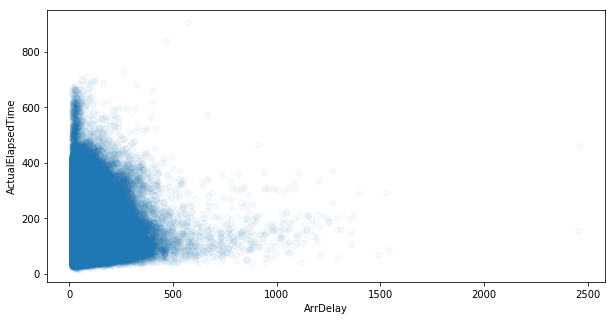

In [54]:
# applying transparency into the above plot
plt.figure(figsize=(10,5))
sb.regplot(data = new_flight,x = 'ArrDelay',y = 'ActualElapsedTime',fit_reg = False,scatter_kws={'alpha':1/30})
plt.show()

> **Observations**

As it can be seen from the plot there is no correlation between Arrival Delay and ActualElapsedTime.

> Third: The relation between ArrDelay and AirTime

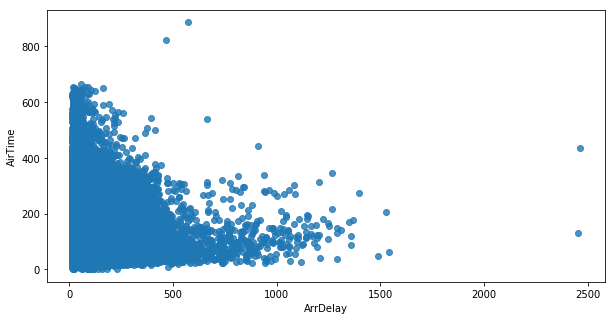

In [55]:
# Arrival Delay and AirTime (numerical Vs numerical)
scatter('ArrDelay','AirTime')                      # calling function scatter  

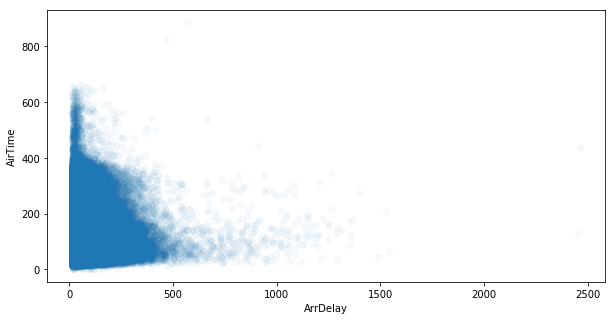

In [56]:
# applying transparency into the above plot
plt.figure(figsize=(10,5))
sb.regplot(data = new_flight,x = 'ArrDelay',y = 'AirTime',fit_reg = False,scatter_kws={'alpha':1/30})
plt.show()

> **Obsevations**

From the above chart the two variables doesn't have relation.

> Fourth: The relation with **ArrDelay and Origin**

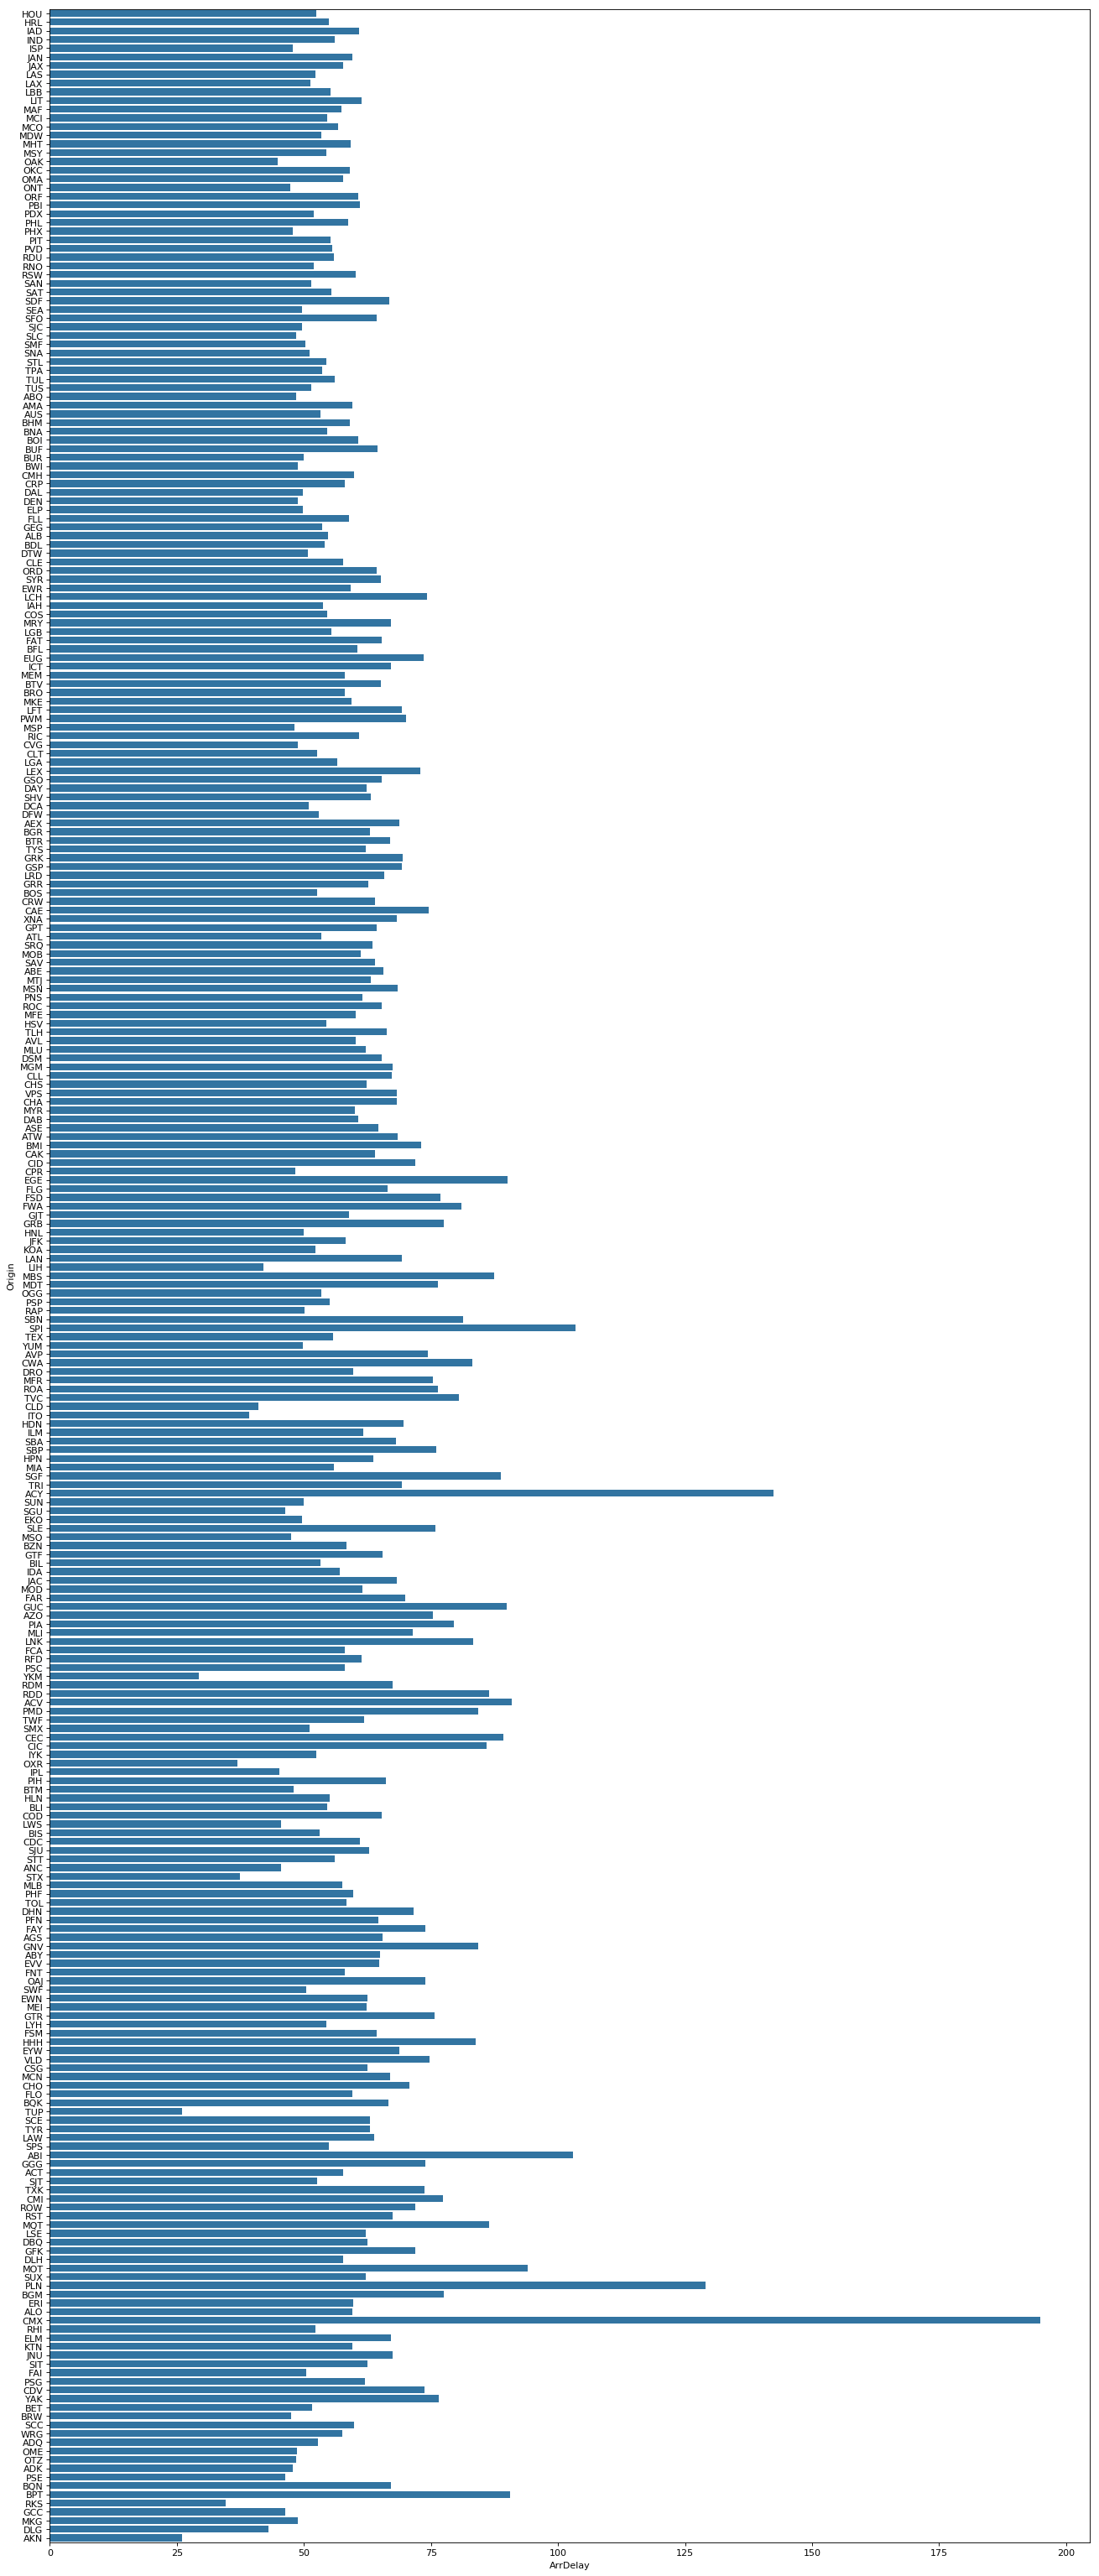

In [57]:
figure(num=None, figsize=(20,50), dpi=80, facecolor='w', edgecolor='r')
sb.barplot(data = new_flight,y = 'Origin',x = 'ArrDelay',ci = None,color = sb.color_palette()[0])
plt.show()

In [58]:
# To get ariports with the max and min ArrDelay mean,since the names of the Origin isn't seen clearly in the above plot
average_ArrDelay = new_flight.groupby('Origin')['ArrDelay'].mean()
max_ArrDelayOrigin = [i for i, d in average_ArrDelay.items() if d == average_ArrDelay.max()]   # the airport with the maximum mean ArrDelay
print(max_ArrDelayOrigin)                                                                      # CMX(Houghton County Memorial Airport)  

min_ArrDelayOrigin = [i for i, d in average_ArrDelay.items() if d == average_ArrDelay.min()]   # The airport with the minimum mean ArrDelay
print(min_ArrDelayOrigin)                                                                      # AKN(King Salmon airport) and TUP(Tupelo Regional Airport)

['CMX']
['AKN', 'TUP']


> **Observaions**

Both from the plot and the code its observed airport CMX have the highest arrival delay while AKN and TUP have the least arrival delays.

> Fifth: The relation between **ArrDelay and Dest**

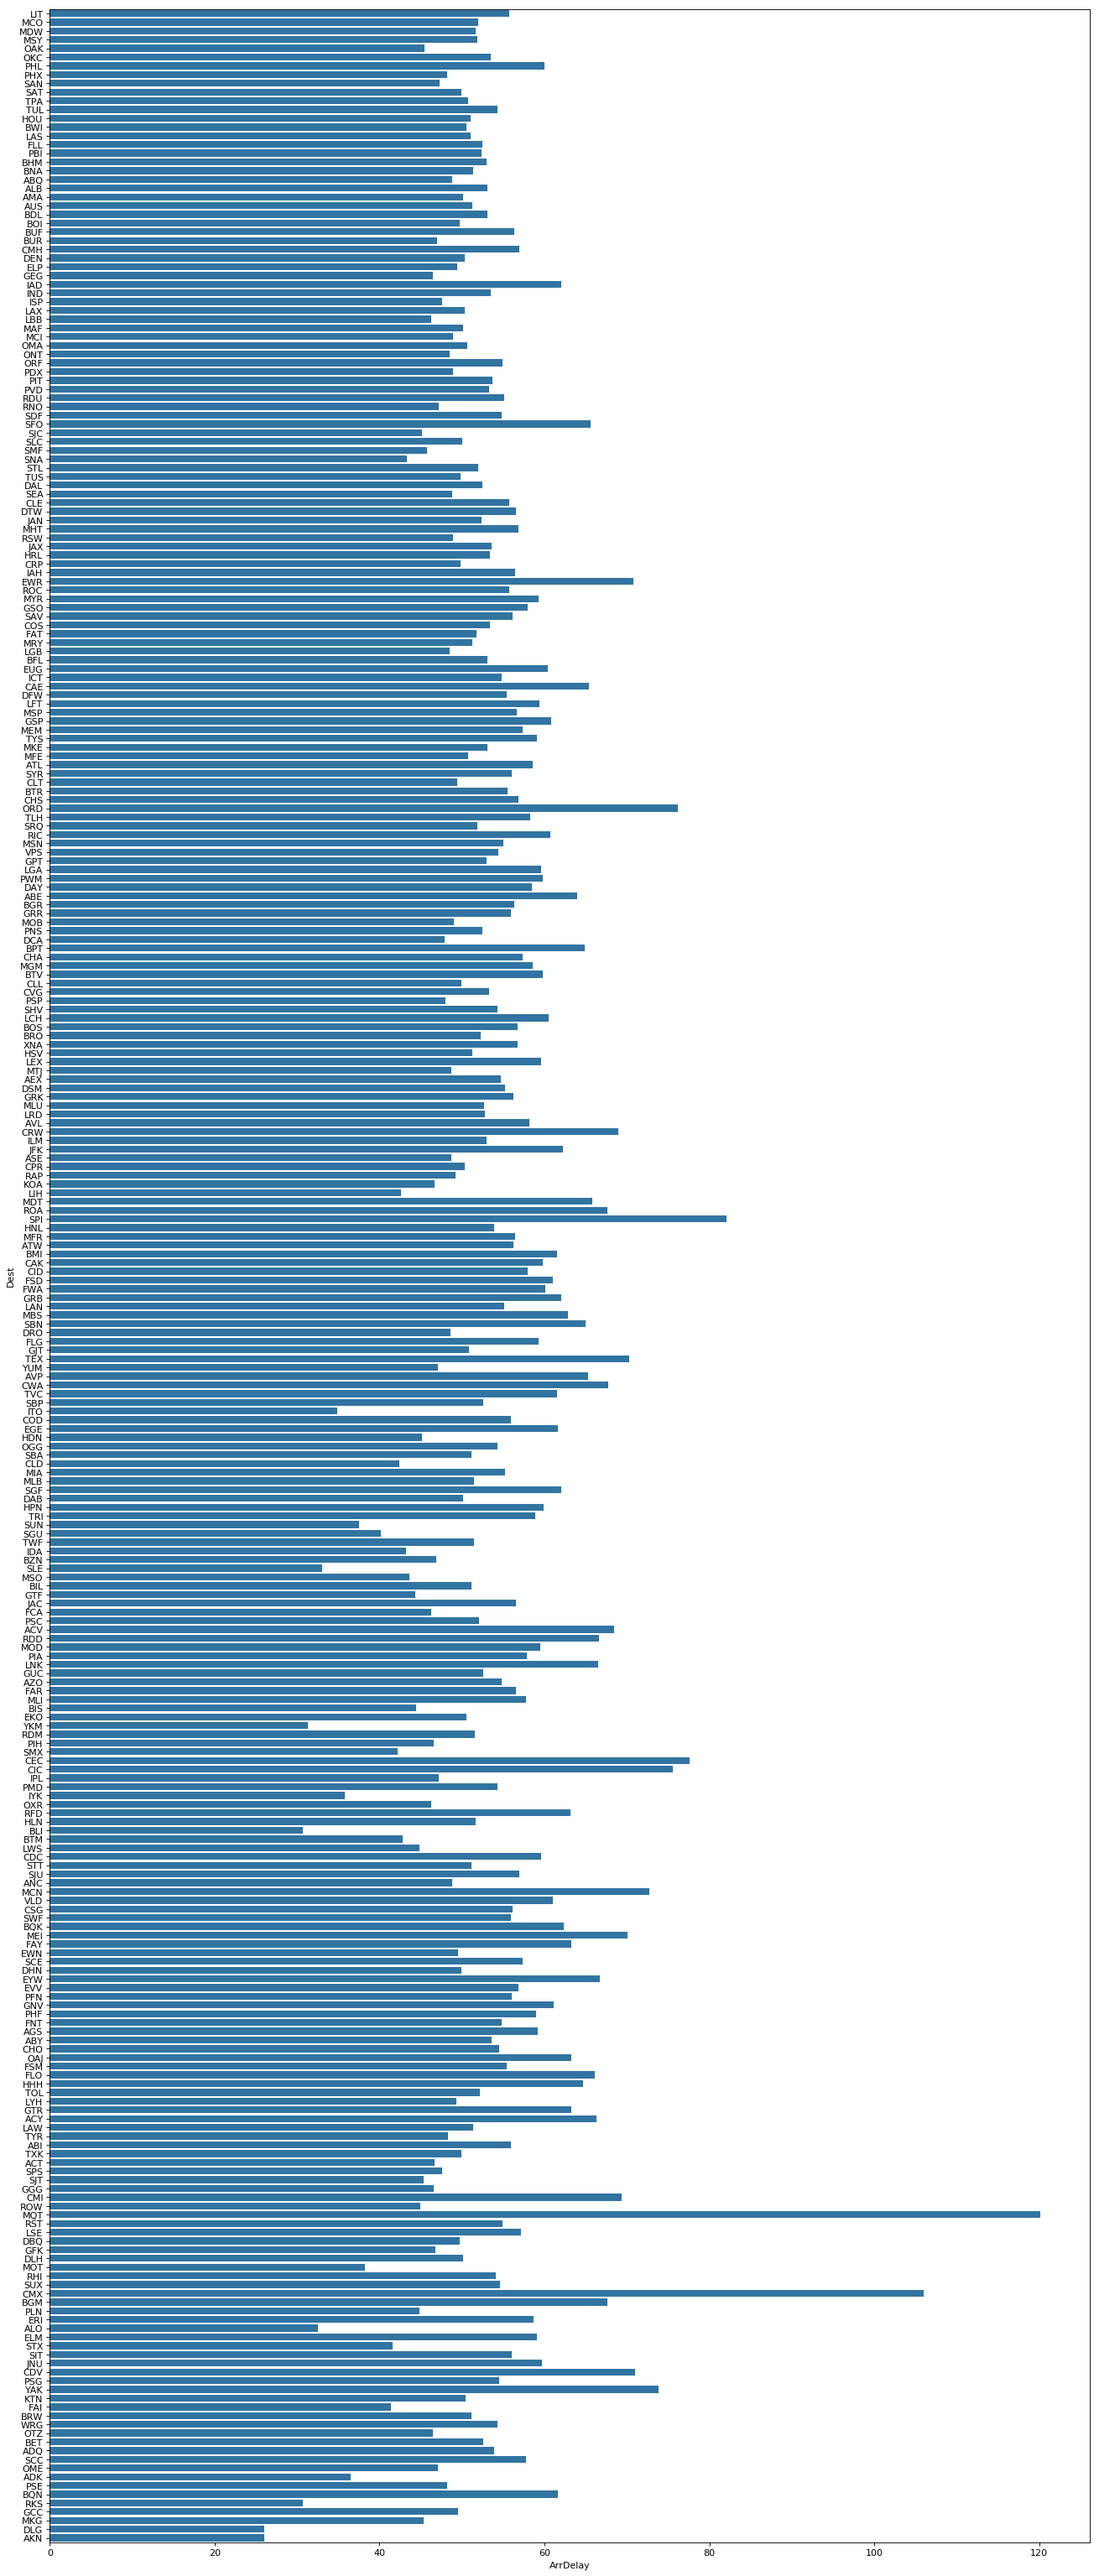

In [59]:
figure(num=None, figsize=(20,50), dpi=80, facecolor='w', edgecolor='r')
sb.barplot(data = new_flight,y = 'Dest',x = 'ArrDelay',ci = None,color = sb.color_palette()[0])
plt.show()

In the plot above, the maximum value is clearly shown but to find the minimum it indepth analysis.

In [60]:
# To get ariports with the max and min ArrDelay mean,since the names of the Dest isn't seen clearly from the above chart
average_ArrDelay = new_flight.groupby('Dest')['ArrDelay'].mean()
max_ArrDelayDest = [i for i, d in average_ArrDelay.items() if d == average_ArrDelay.max()]   # the airport/s with the maximum mean ArrDelay
print(max_ArrDelayDest)                                                                      # MQT(Marquette County Airport)  

min_ArrDelayDest = [i for i, d in average_ArrDelay.items() if d == average_ArrDelay.min()]   # the airport/s with the minimum mean ArrDelay
print(min_ArrDelayDest)                                                                      # AKN(King Salmon airport) and DLG(Dillingham Airport)

['MQT']
['AKN', 'DLG']


> **Observaions**

Both from the plot and the code its observed airport MQT have the highest destination arrival delay while AKN and DLG have the least arrival delays.

> Sixth: The relation between **ArrDelay and Distance**

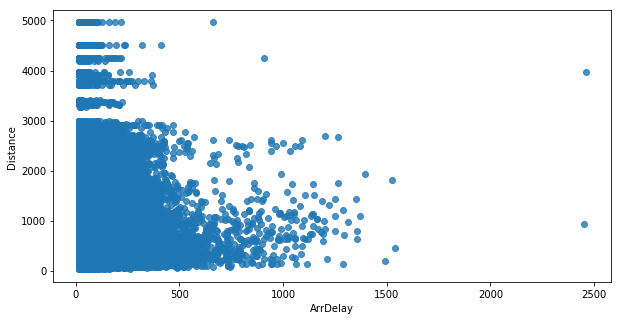

In [61]:
# Arrival Delay and Distance (numerical Vs numerical)
scatter('ArrDelay','Distance')                      # calling function scatter 

> **Observations**

From the chart, there is no correlation between distance and arrival delay, thus distance of a flight doesn't affect arrival delay.

> Seventh: The relation between **ArrDelay and WeatherDelay**

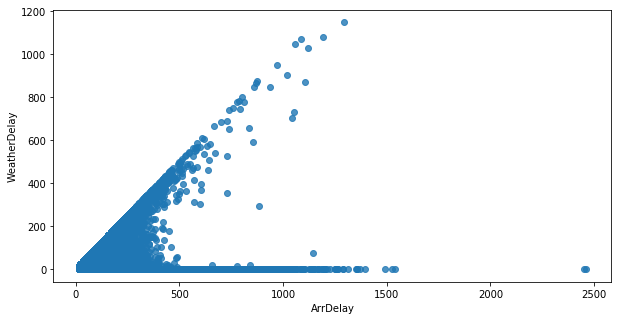

In [62]:
# Arrival Delay and Weather Delay (numerical Vs numerical)
scatter('ArrDelay','WeatherDelay')                  # calling function scatter 

Using bar plot to better understand the distribution of weather delay respect to arrival delay

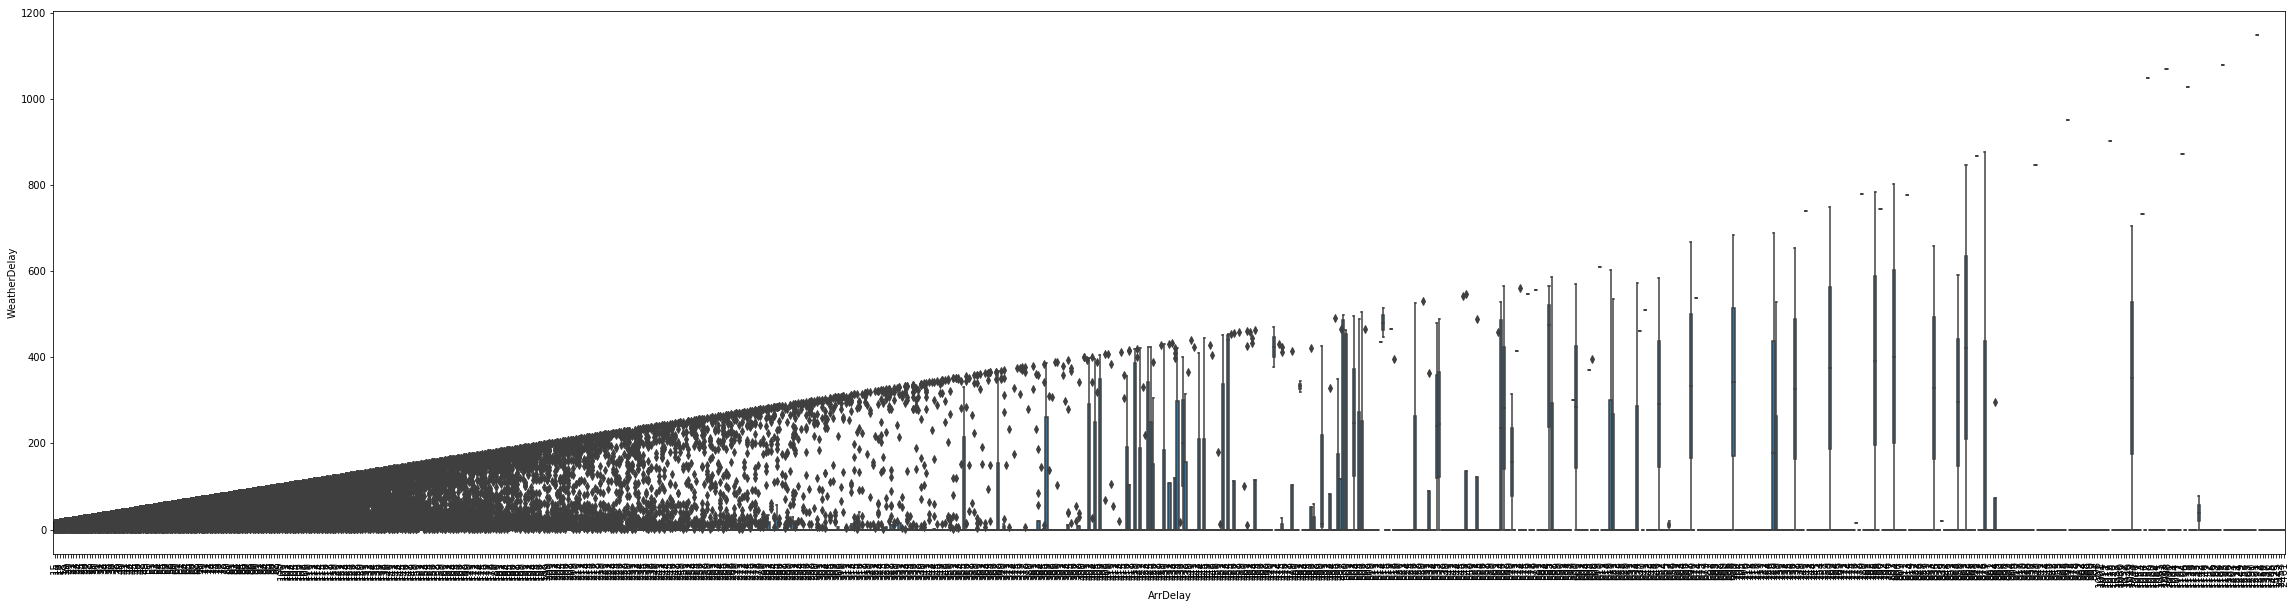

In [63]:
# using box plot to understand the relation better 
bivariate_boxPlot('ArrDelay','WeatherDelay')     # calling function bivariate_boxPlot   

Since there are large number of entries it's diffcult to see the number but the distribution is observed. To closely observe the distribution, I wanted to use 3 subsets of the dataset, from the begining, middle and end.

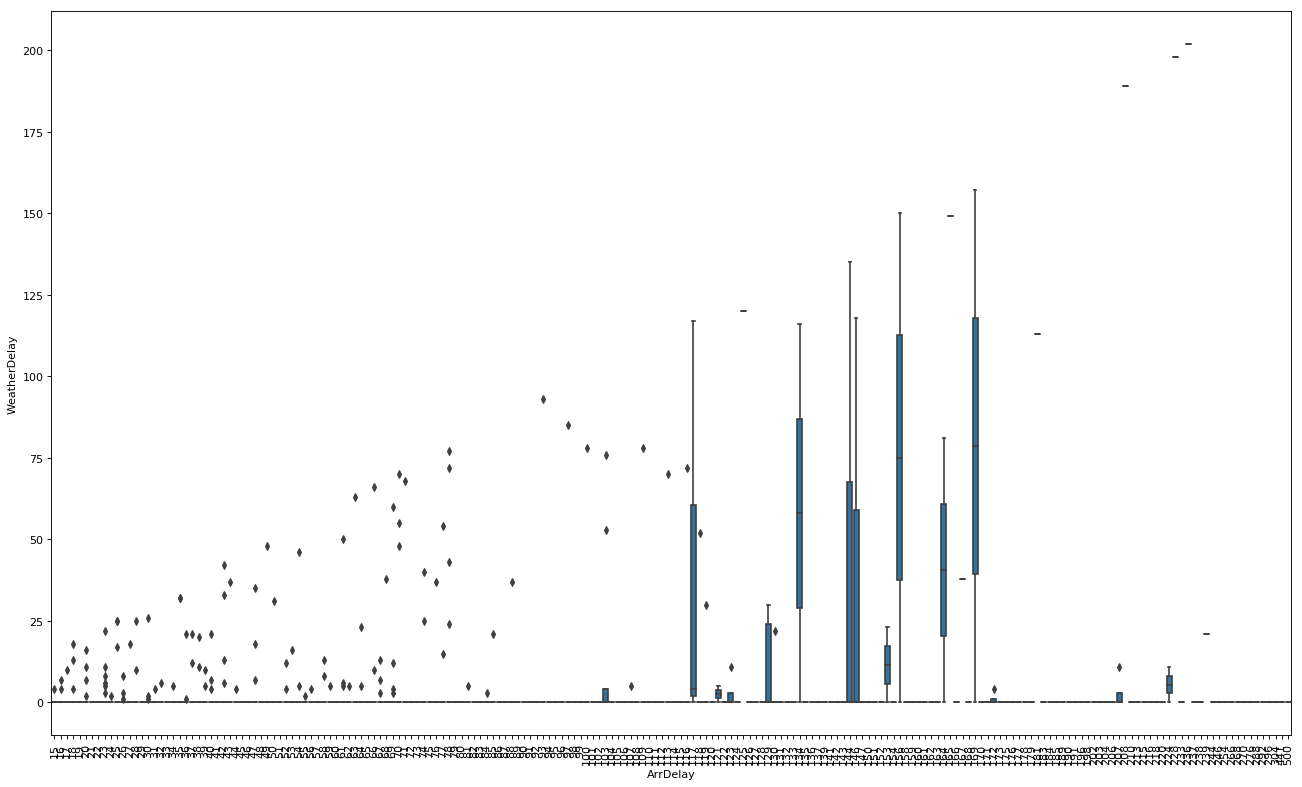

In [97]:
# begining
new = new_flight.iloc[0:3500,:]
bi_scatter(new,'ArrDelay','WeatherDelay')

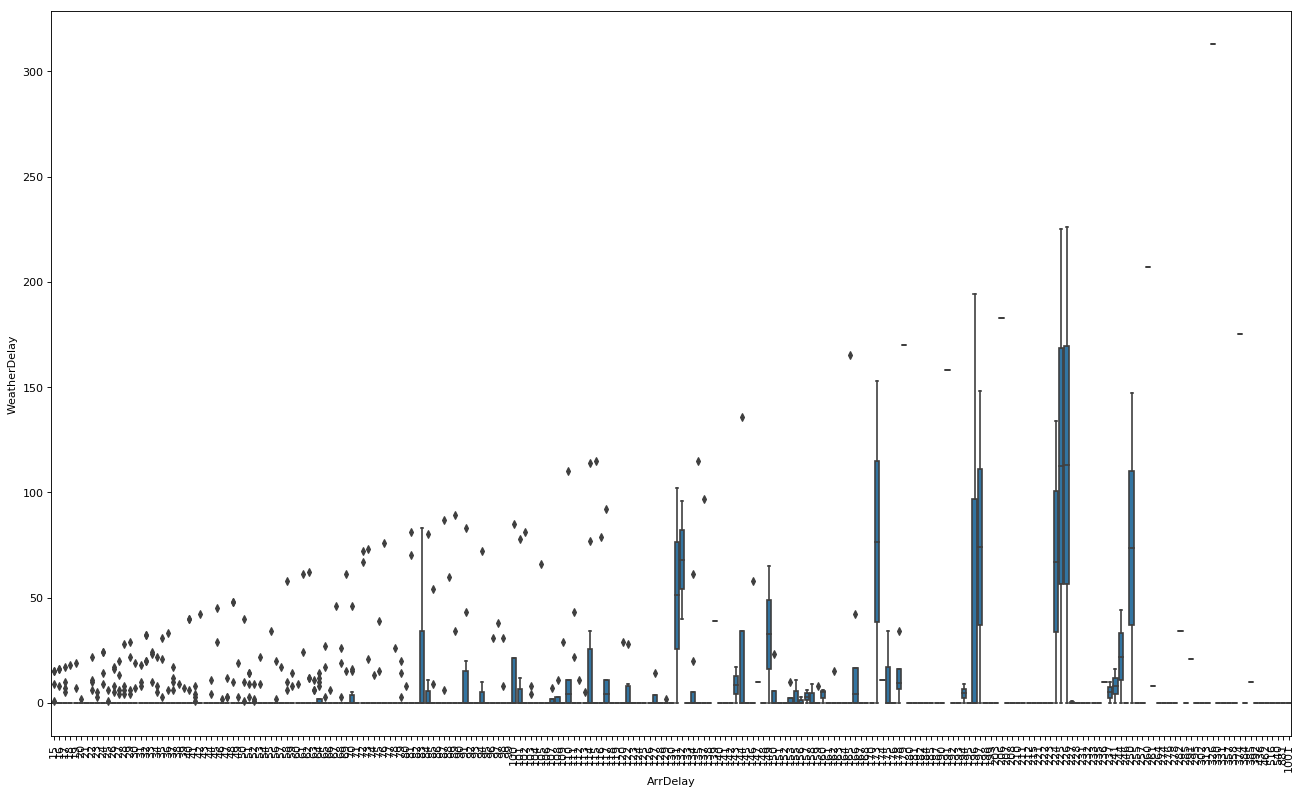

In [65]:
# middle
new = new_flight.iloc[295000:298000,:]
bi_scatter(new,'ArrDelay','WeatherDelay')

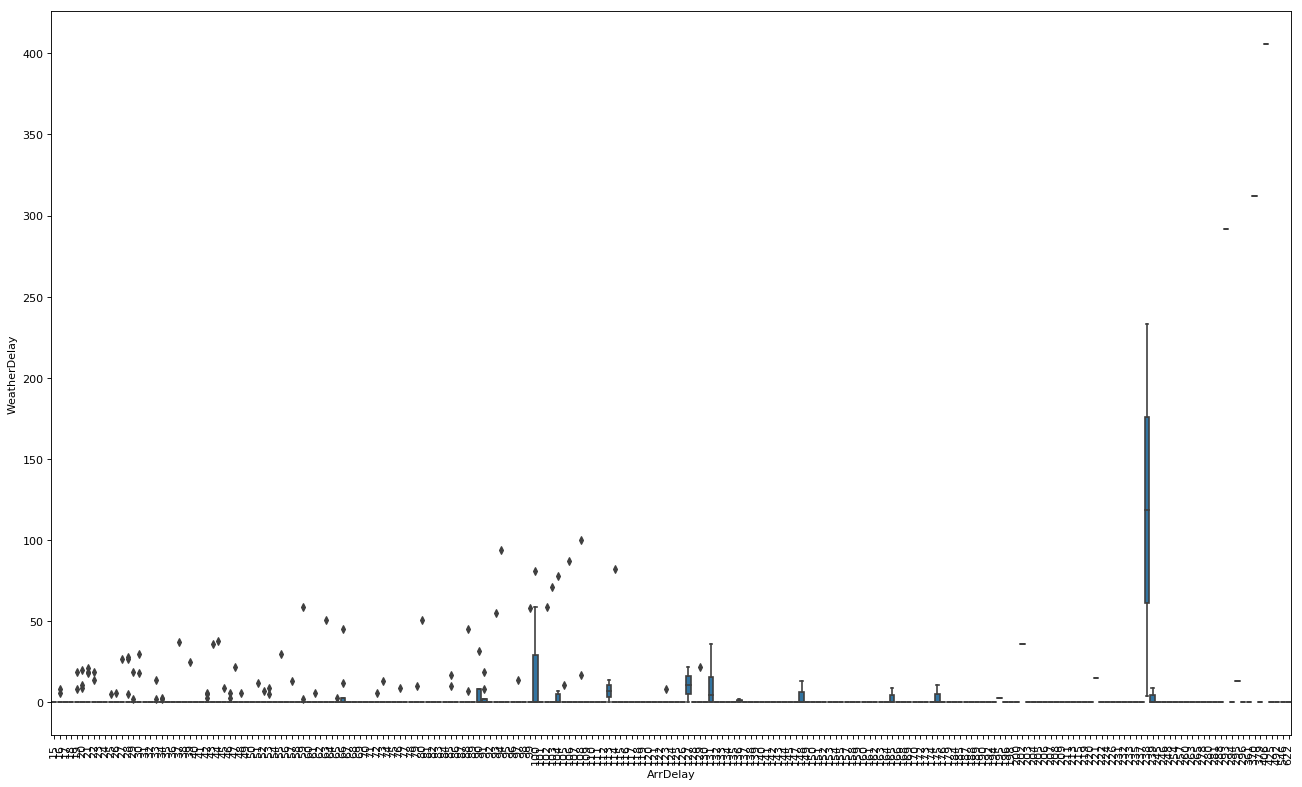

In [66]:
#end
new = new_flight.iloc[575000:578000,:]
bi_scatter(new,'ArrDelay','WeatherDelay')

> **Observations**

From all the plots its understood that there is a correlation between arrival delay and weather delay.

> Eighth: The relation between **ArrDelay and NASDelay*

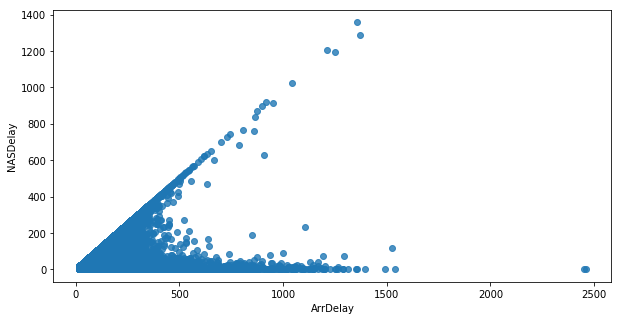

In [67]:
# Arrival Delay and NAs Delay (numerical Vs numerical)
scatter('ArrDelay','NASDelay')                      # calling function scatter

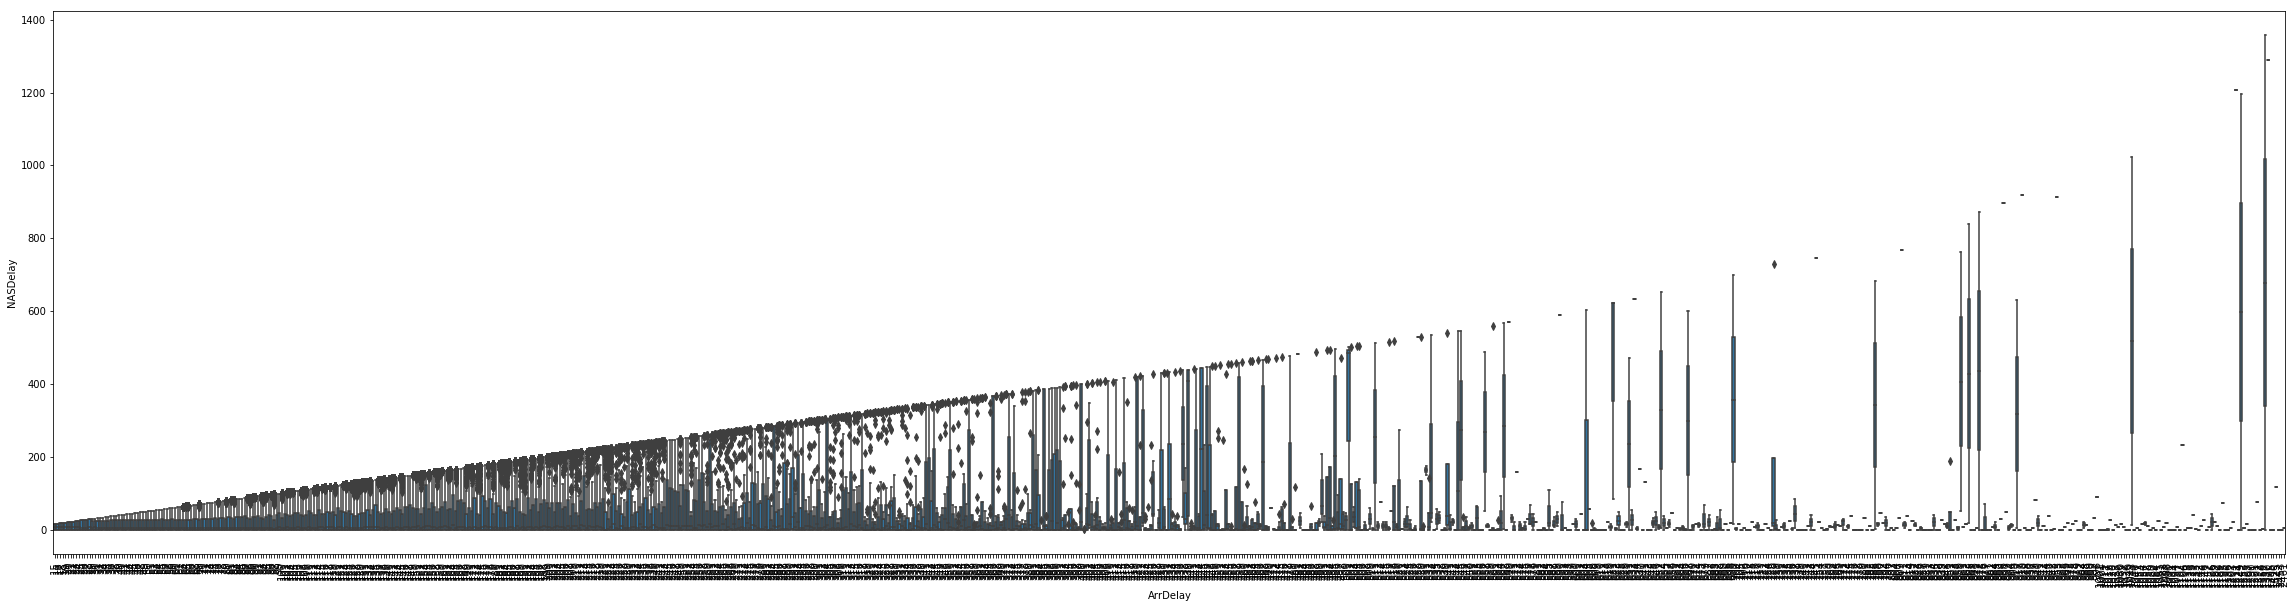

In [68]:
# using box plot to understand the relation better 
bivariate_boxPlot('ArrDelay','NASDelay')         # calling function bivariate_boxPlot

Since there are large number of entries it's diffcult to see the number but the distribution is observed. To closely observe the distribution, I wanted to use 3 subsets of the dataset, from the begining, middle and end.

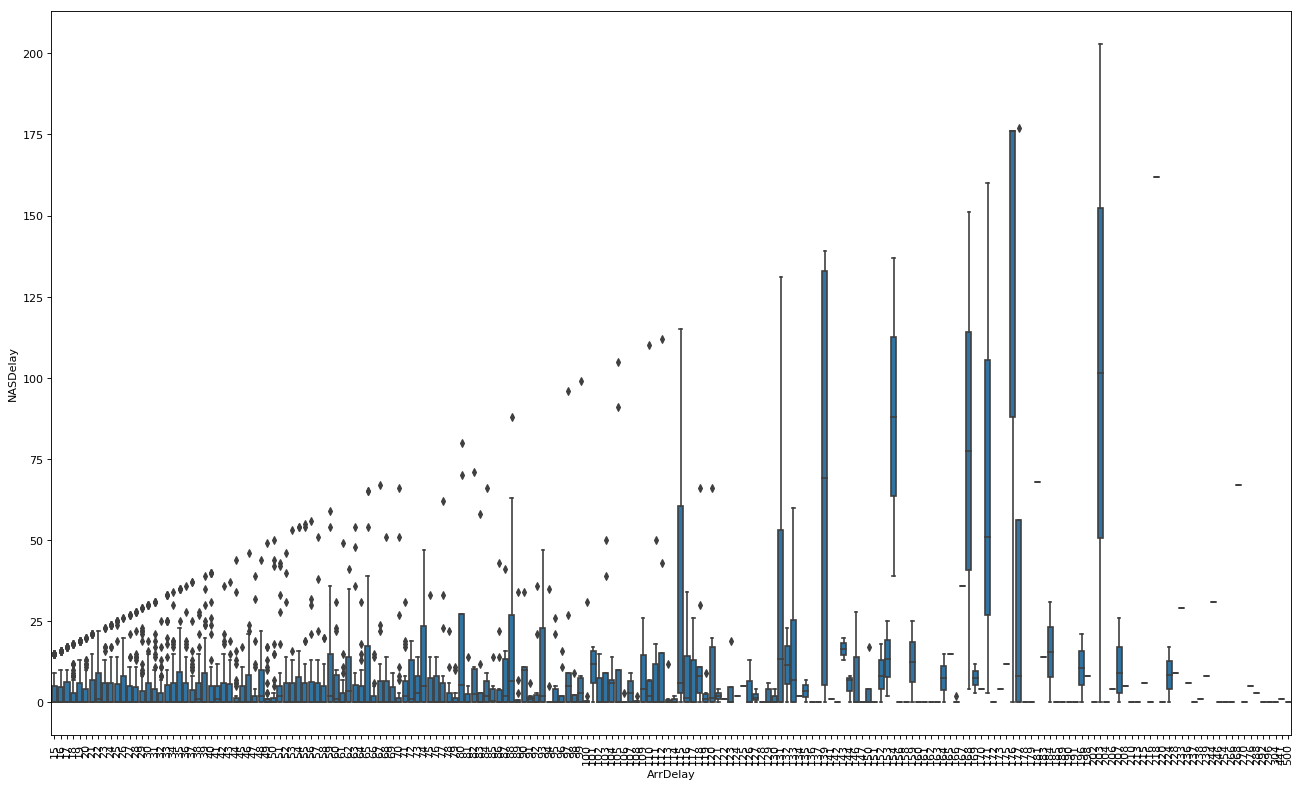

In [69]:
# begining
new = new_flight.iloc[0:3500,:]
bi_scatter(new,'ArrDelay','NASDelay')

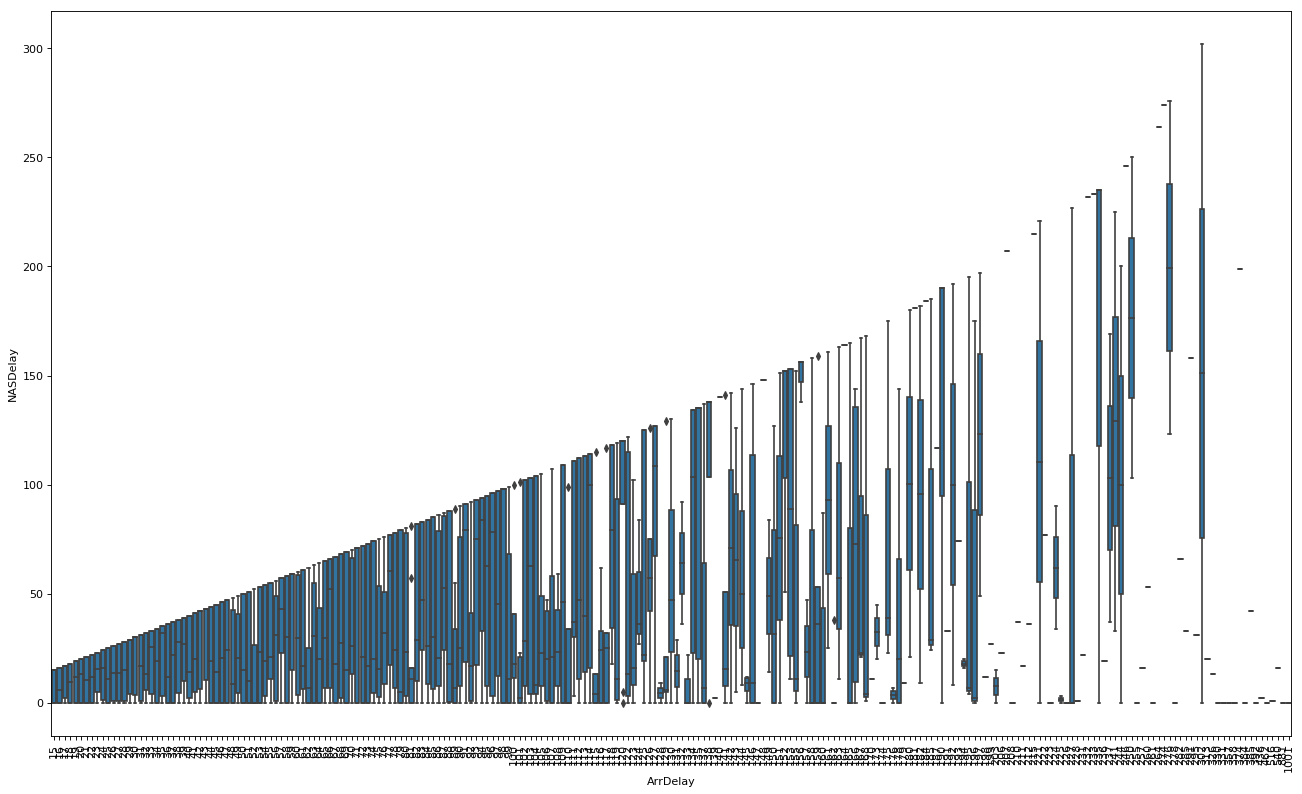

In [70]:
# middle
new = new_flight.iloc[295000:298000,:]
bi_scatter(new,'ArrDelay','NASDelay')

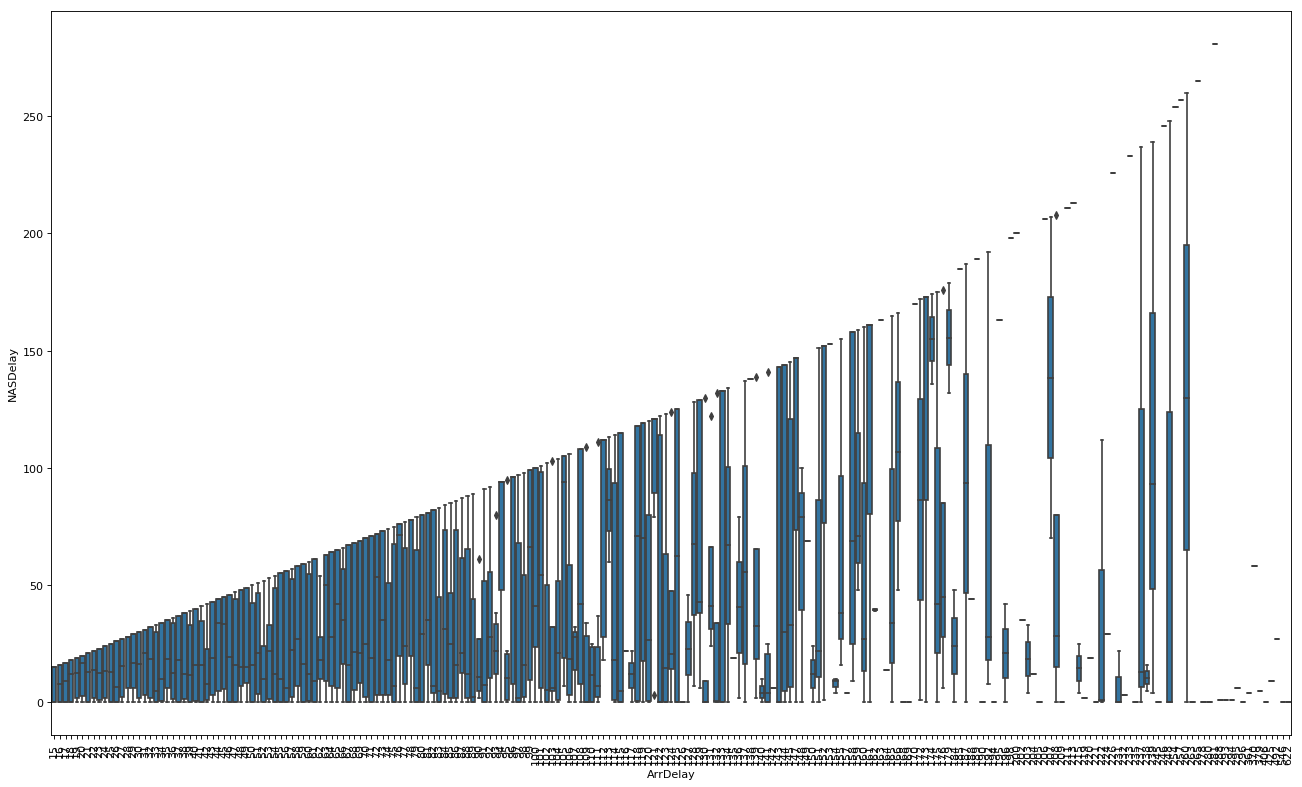

In [71]:
# end
new = new_flight.iloc[575000:578000,:]
bi_scatter(new,'ArrDelay','NASDelay')

> **Observations**

It's observed from the above chart as the arrival delay increases the NAS delay with in the range 0 and some value its distribution increases, therefore there is a correlation between this two features.

> Ninth: The relation between **ArrDelay and SecurityDelay**

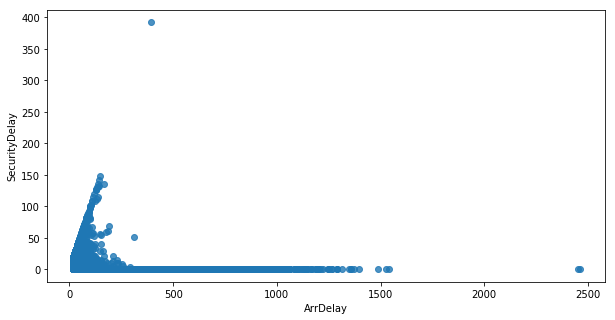

In [72]:
# Arrival Delay and Security Delay (numerical Vs numerical)
scatter('ArrDelay','SecurityDelay' )                # calling function bivariate_boxPlot

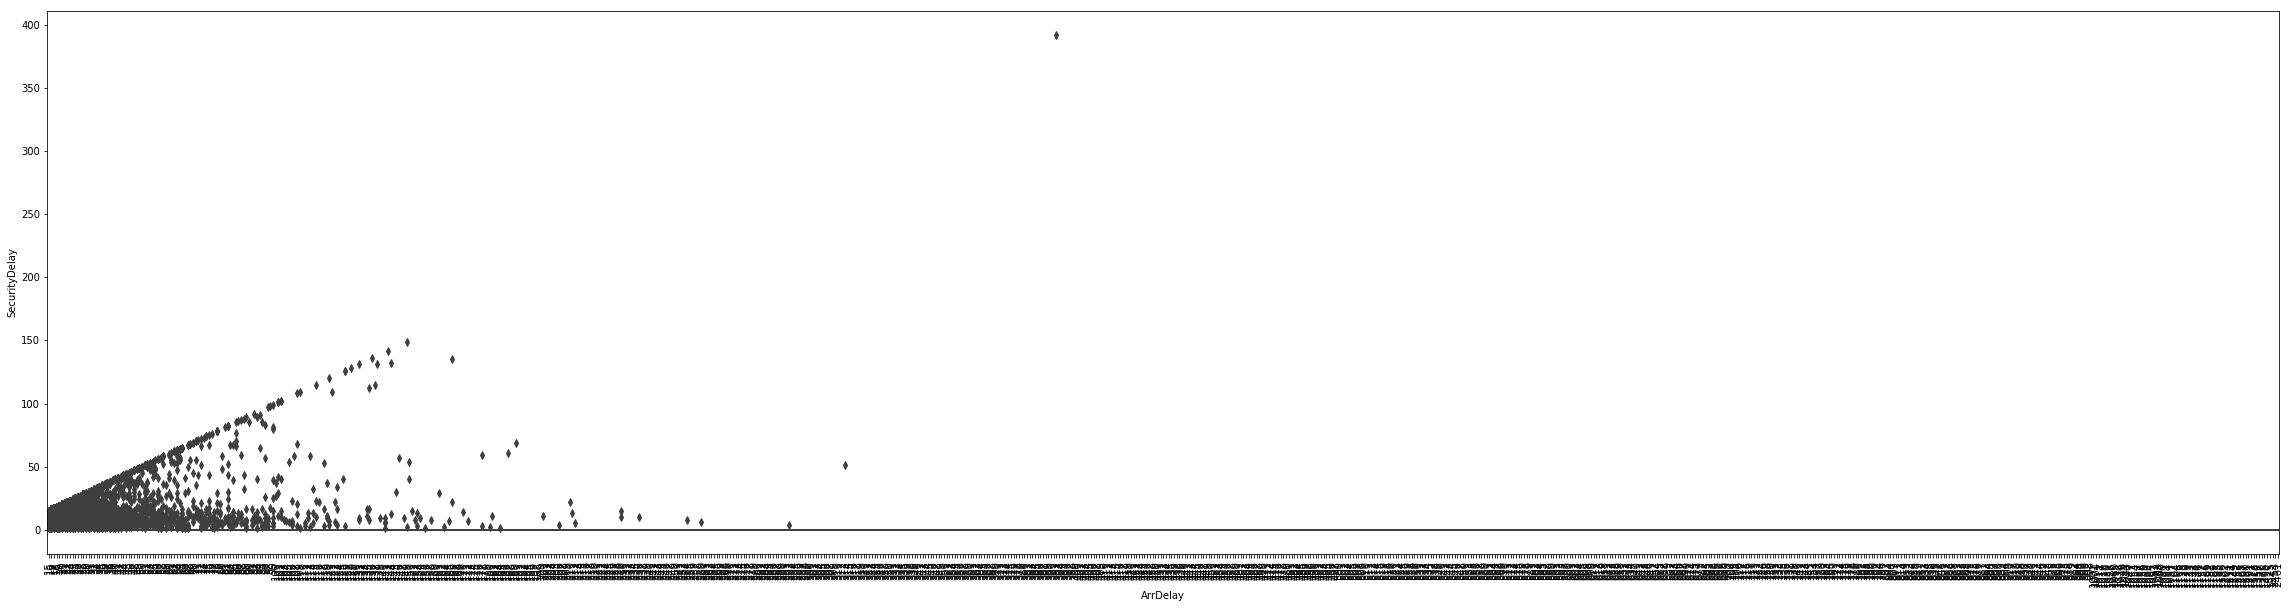

In [73]:
# using box plot to understand the relation better
bivariate_boxPlot('ArrDelay','SecurityDelay')    # calling function bivariate_boxPlot

To closely observe the distribution, I wanted to use 3 subsets of the dataset, from the begining, middle and end.

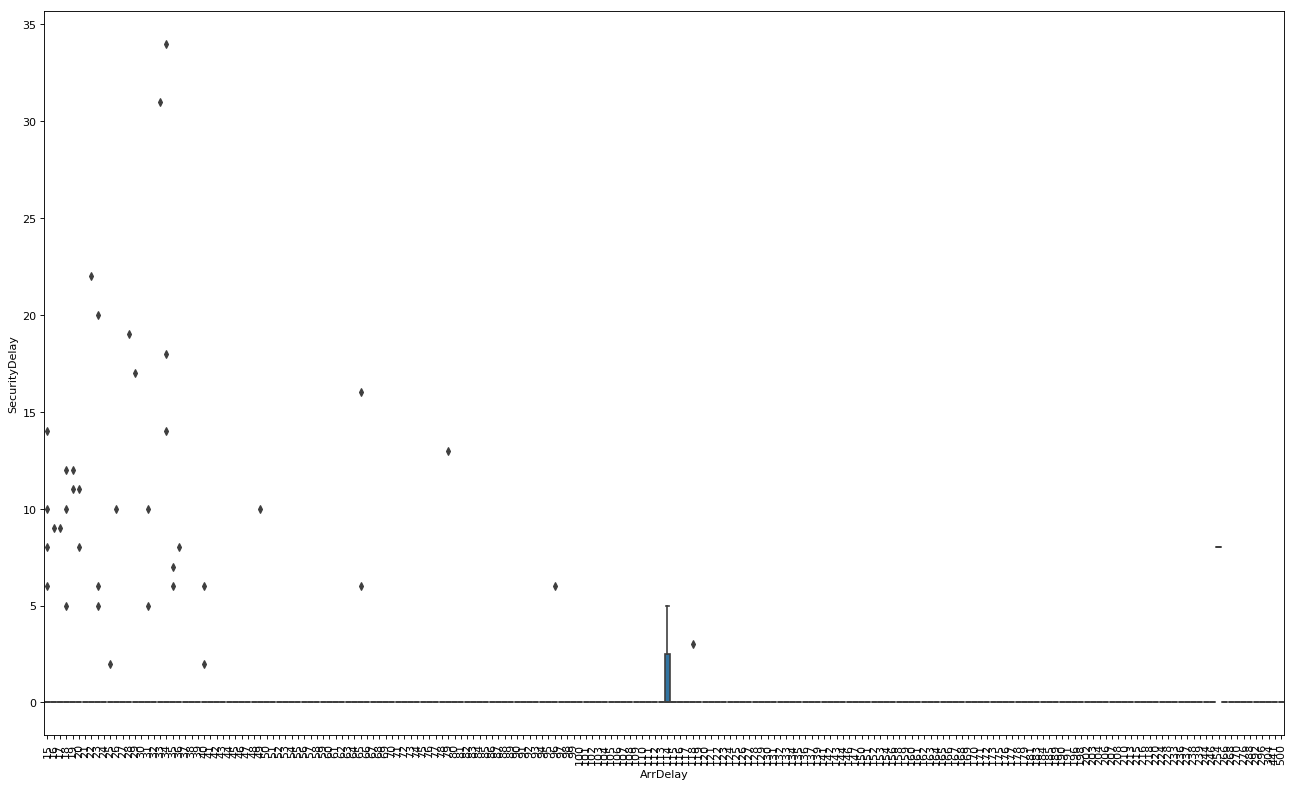

In [74]:
# begining
new = new_flight.iloc[0:3500,:]
bi_scatter(new,'ArrDelay','SecurityDelay')

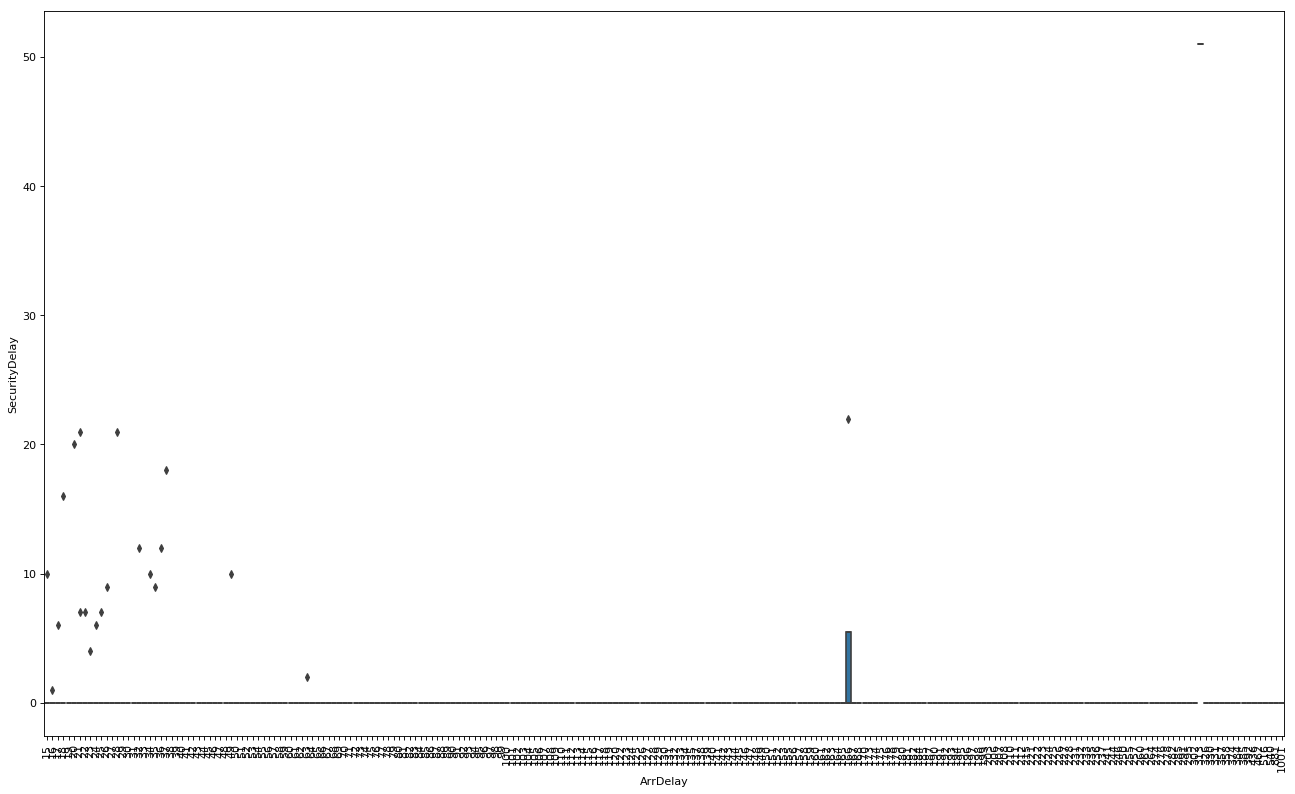

In [75]:
# middle
new = new_flight.iloc[295000:298000,:]
bi_scatter(new,'ArrDelay','SecurityDelay')

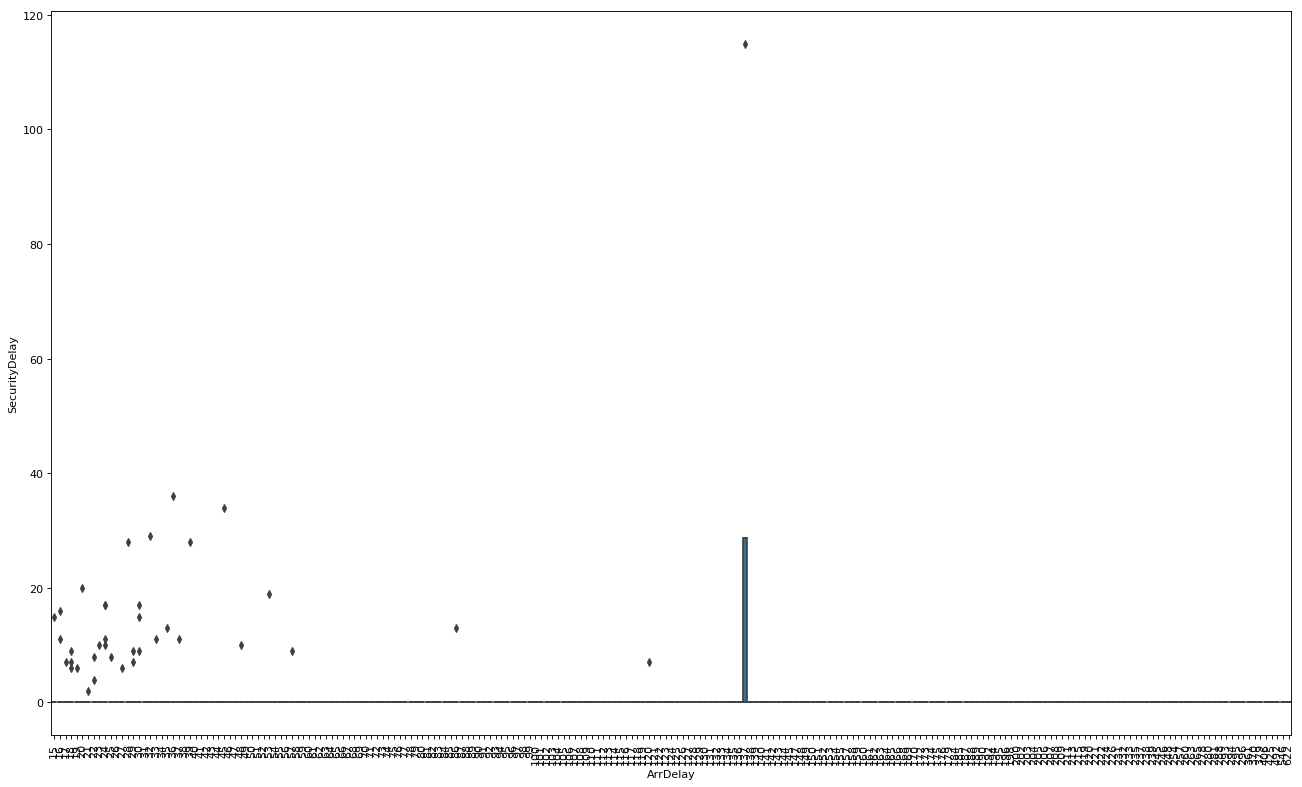

In [76]:
# end
new = new_flight.iloc[575000:578000,:]
bi_scatter(new,'ArrDelay','SecurityDelay')

> **Observations**

From the first and second plots it hard to tell the relation between these two variable but looking more closely to the distribution ArrDelay and SecurityDelay don't have correlation.

>Tenth: The relation between ArrDelay and LateAircraftDelay

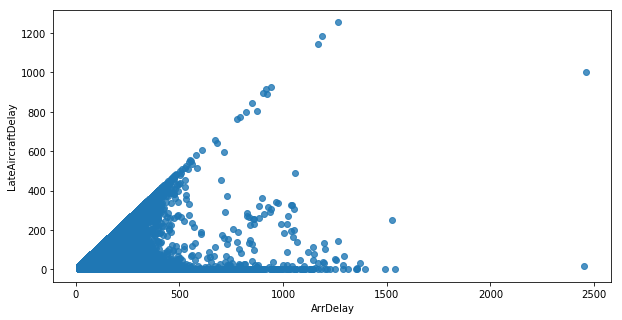

In [77]:
# Arrival Delay and Late Aircraft Delay (numerical Vs numerical)
scatter('ArrDelay','LateAircraftDelay')             # calling function scatter

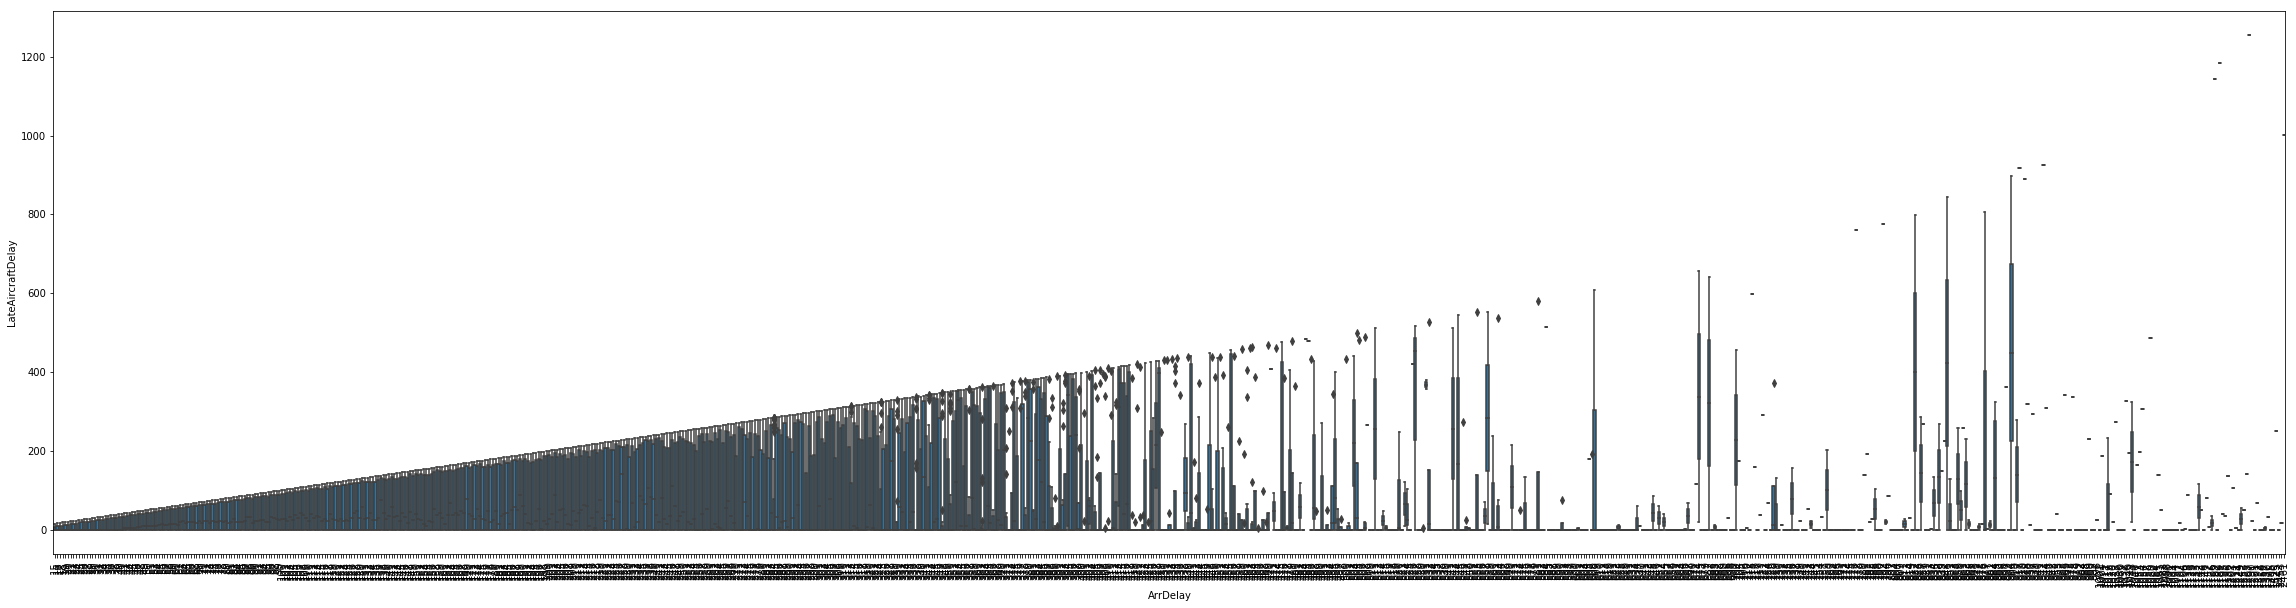

In [78]:
# using box plot to understand the relation better
bivariate_boxPlot('ArrDelay','LateAircraftDelay') # calling function bivariate_boxPlot

Since there are large number of entries it's diffcult to see the number but the distribution is observed. To closely observe the distribution, I wanted to use 3 subsets of the dataset, from the begining, middle and end.

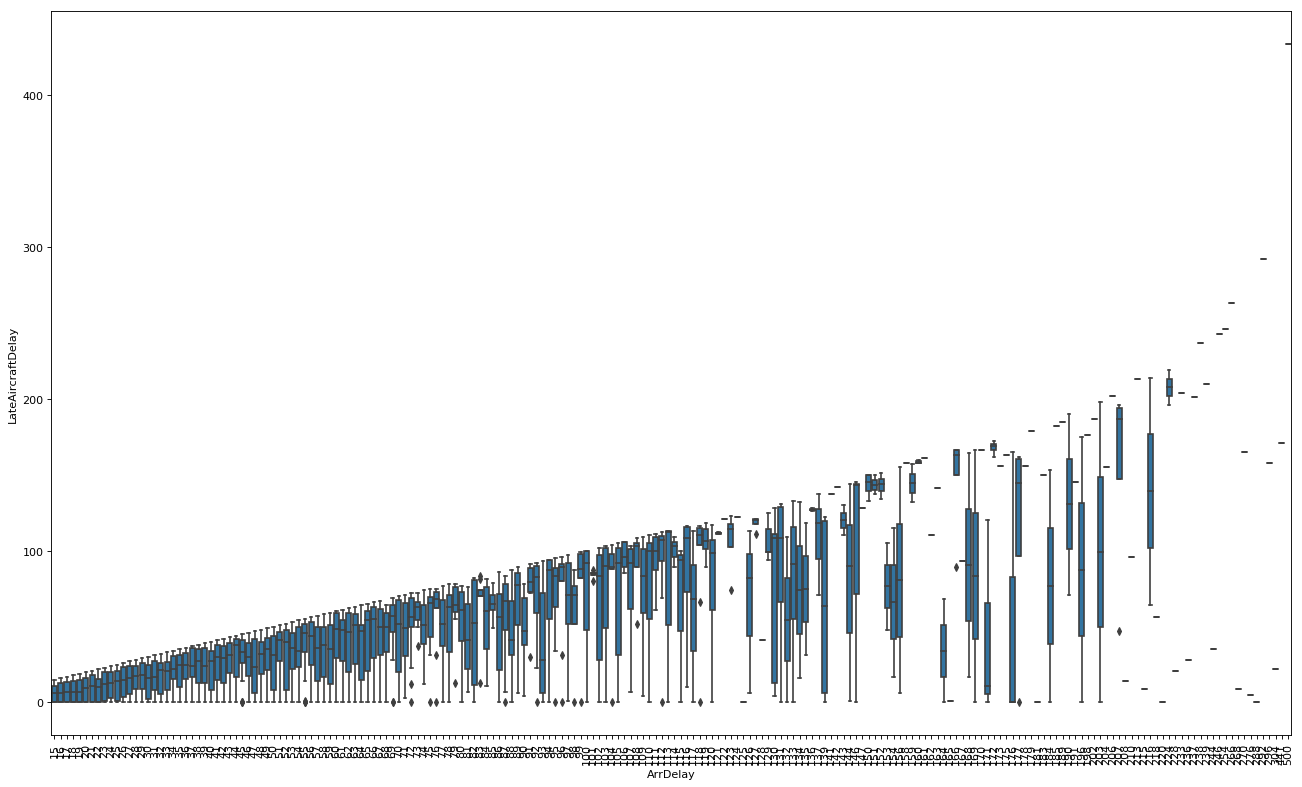

In [79]:
# begining
new = new_flight.iloc[0:3500,:]
bi_scatter(new,'ArrDelay','LateAircraftDelay')

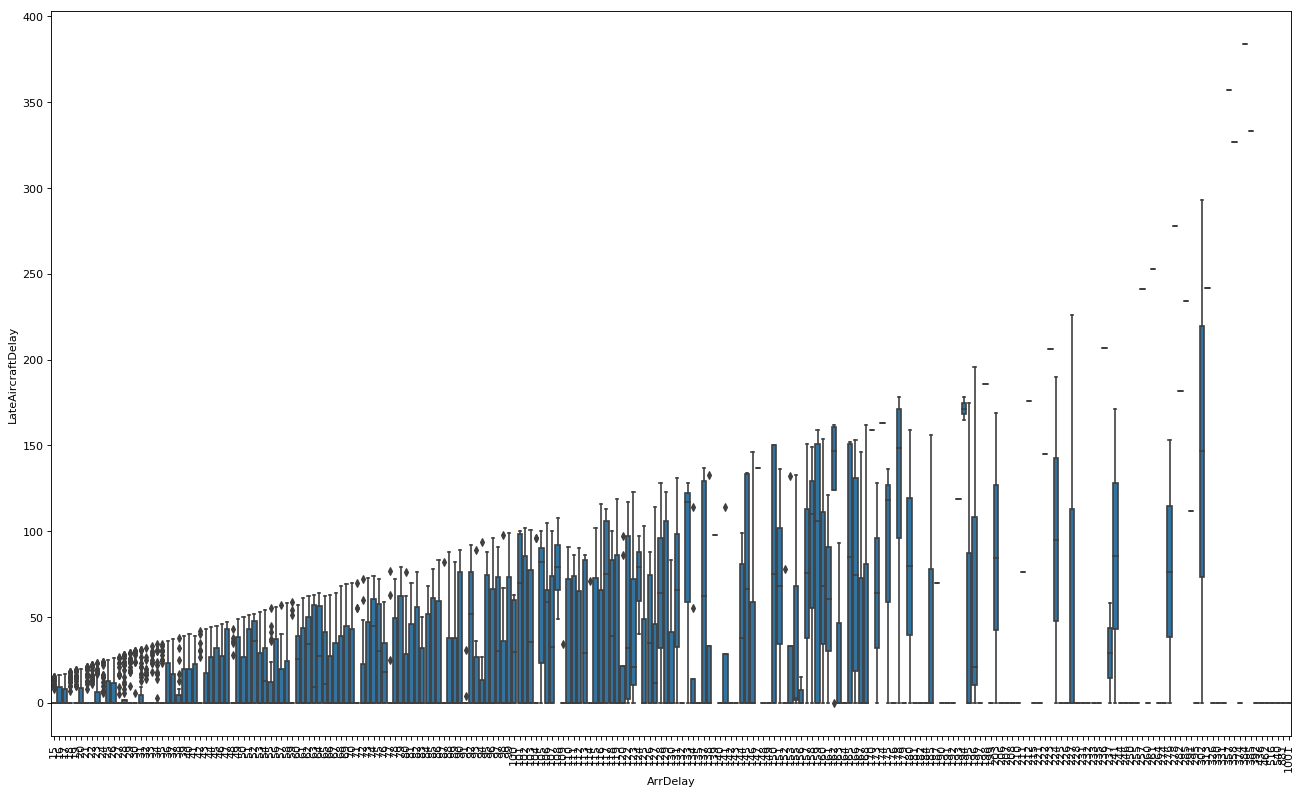

In [80]:
# middle
new = new_flight.iloc[295000:298000,:]
bi_scatter(new,'ArrDelay','LateAircraftDelay')

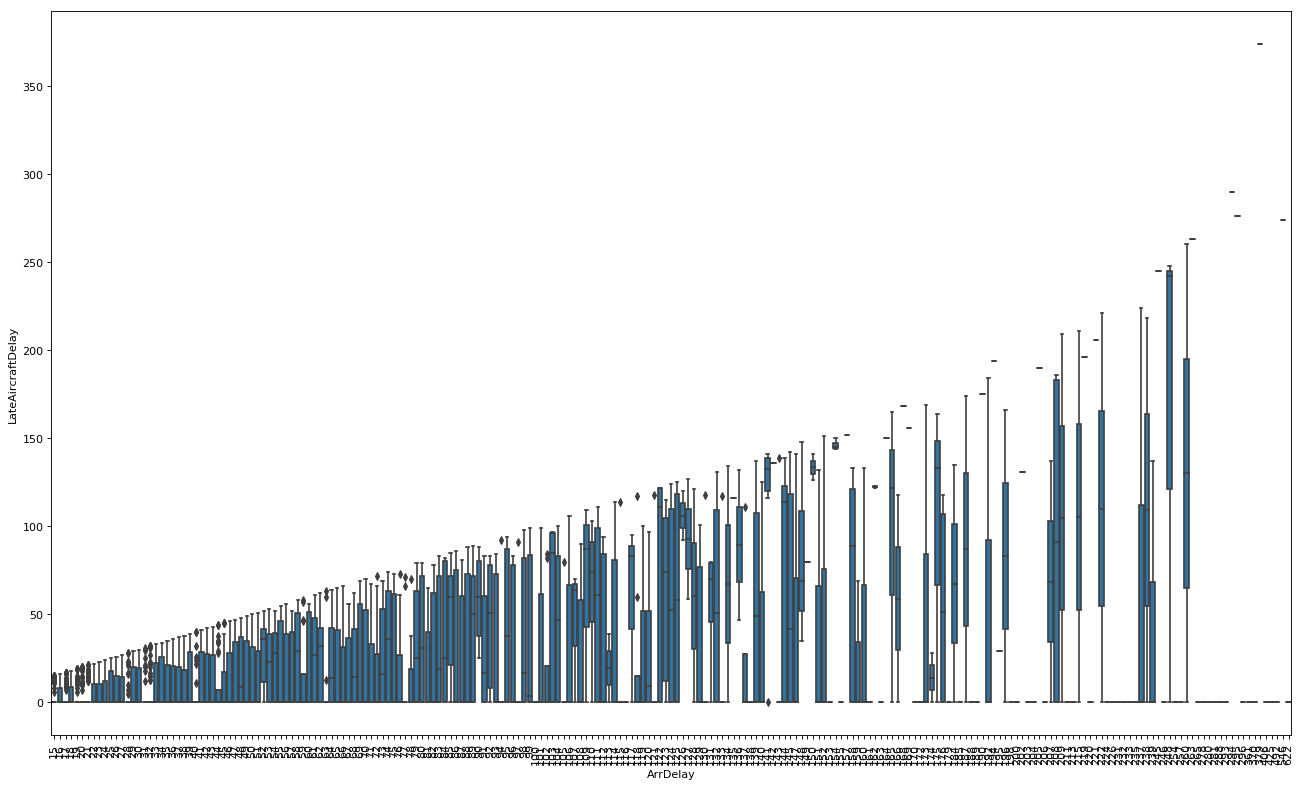

In [81]:
# end
new = new_flight.iloc[575000:578000,:]
bi_scatter(new,'ArrDelay','LateAircraftDelay')

> **Observations**

From the plots above, it's seen that there is a positive correlation between arrival delay and late aircraft delay.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- As it was stated above, my interest feature is ArrDelay. In the Bivariate exploration it's relation with other variables of the dataset is plotted
- From the bivariate charts, it's implied that ArrDelay have strong or direct correlation with DepDelay. While it also have correlation with WeatherDelay,NASDelay and LateAircraftDelay, it's not obvious enough with departure delay.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The way the other feature(ActualElapsedTime,AirTime,Distance) didn't show relation with ArrDelay was in the same way. The plots of this features with ArrDelay showed their distribution being confined within some intervel, and values out of this rang showed no correlation with ArrDelay. 
- Origin and Dest are string variables. Their plots with ArrDelay show the mean value of the arrival delay of each airports. It resulted in the airport with the highest arrival delay not having the highest destination delay.
- It's also observed on of the delay features Security doesn't have correlation with ArrDelay, which was unexpected.

<a id = 'multivariate'></a>
## Multivariate Exploration

> From the above bivariate exploration, its shown ArrDelay have more correlation with DepDelay. Andalso with WeatherDelay,NasDelay and LateAircraftDelay. I want to further investigate how this features relate to each other, not include variables of new_flight that doesn't show any relation with ArrDelay.

> First: ArrDelay,DepDelay and WeatherDelay

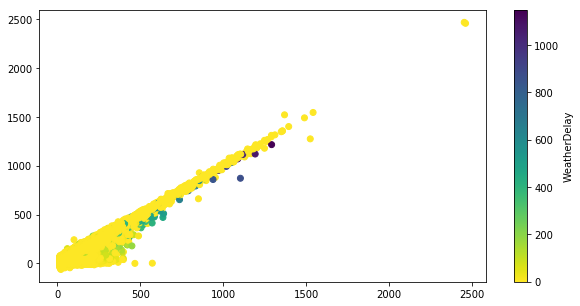

In [82]:
# ArrDelay,DepDelay and WeatherDelay
multi_scatter('ArrDelay','DepDelay','WeatherDelay','WeatherDelay')       # calling function multi_scatter

>**Observations**

The three features plotted above have a correlation with eachothers.

> Second: ArrDelay.DepDelay and NASDelay

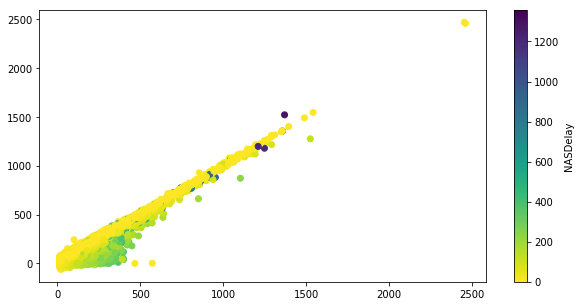

In [83]:
# ArrDelay,DepDelay and NASDelay
multi_scatter('ArrDelay','DepDelay','NASDelay','NASDelay')       # calling function multi_scatter

> **Observaions**

From the above chart the three variables show a correlation with eachothers.

> Third: ArrDelay,DepDelay and SecurityDelay

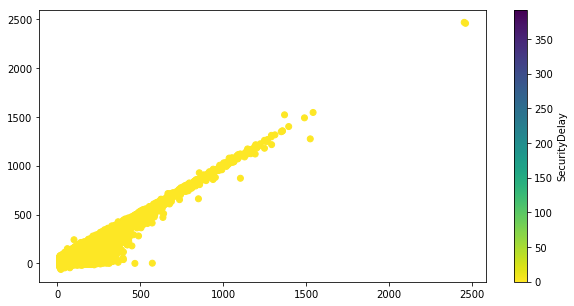

In [84]:
# ArrDelay,DepDelay and SecurityDelay
multi_scatter('ArrDelay','DepDelay','SecurityDelay','SecurityDelay')       # calling function multi_scatter

While Security delay didn't show correlation with ArrDelay in the bivariate secion,here it depicts the opposite. Therefore to know the reason I want to view it's relation with DepDelay.

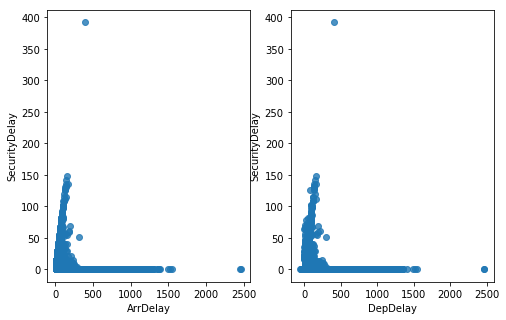

In [85]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sb.regplot(data = new_flight,x = 'ArrDelay',y = 'SecurityDelay',fit_reg=False);

plt.subplot(1,2,2)
sb.regplot(data = new_flight,x = 'DepDelay',y = 'SecurityDelay',fit_reg=False);

>**Observations**

From the above charts, SecurityDelay seemed not to have correlation with ArrDelay and DepDelay respectively. But in the multivariate relation, SecurityDelay have a correlation with ArrDelay and DepDelay.

> Fourth: ArrDelay,DepDelay and LateAircraftDelay

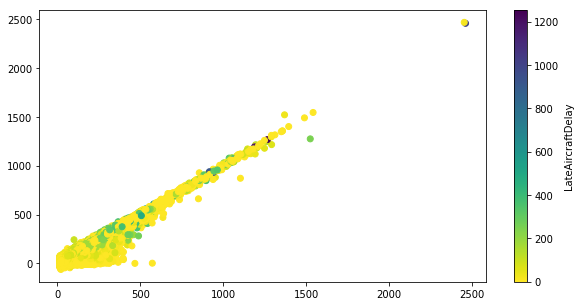

In [93]:
# ArrDelay,DepDelay and LateAircraftDelay
multi_scatter('ArrDelay','DepDelay','LateAircraftDelay','LateAircraftDelay')       # calling function multi_scatter

> **Observations**

Here also LateAircraftDelay shows a correlation relation with ArrDelay and DepDelay.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Arrival delay have correlation with departure delay, weather delay, Nas delay and late aircraft delay. 
- Security delay didn't show correlation in the bivariate section, but when it was plotted against arrival delay and departure delay it resulted positive relation for values less than 50. To concluded I would state security delay to have correlation with arrivaly delay but not as strong as the other's features.

### Were there any interesting or surprising interactions between features?

- The surprising interaction was to find security delay to have correlation with arrival and departure delay when it's plotted as multivariate. Since when it is plotted against each one of them separately it didn't result in any relation.

<a id = 'conclusions'></a>
## Conclusions
- All the feature are right skewed seen using box plot except Diverted which is zero for all entries.
- ORD has both highest origin and destination number of flights.
- AKN,TUP and DLG have the least number of origin flight. 
- AKN and DLG have the lowest destination flight number.
- All airport recorded don't have diverted flights.
- Arrival delay is related to departure delay,weather delay,NAS delay,security delay and late aircraft delay, which is the result of this exploration.

<a id = 'reference'></a>
### Reference

- https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram
- https://numpy.org/doc/stable/reference/generated/numpy.logspace.html